In [ ]:
# pip install pmdarima
# best 2 0 2 

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

import numpy as np 
import regex as re

import matplotlib.pyplot as plt
# import matplotlib.artist as art
% matplotlib inline
import matplotlib.lines as lines
import seaborn as sns

# # Import LazyPredict libraries
# import lazypredict
# from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

# from sklearn.pipeline import make_pipeline
from xgboost import XGBRFRegressor
from xgboost import plot_importance
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import validation_curve


from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge



from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import TimeSeriesSplit

from sklearn import metrics

from sklearn.metrics import accuracy_score

from numpy import mean
from numpy import std
from scipy.stats import sem


from sklearn import set_config



# from datetime import datetime



In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/df_institutional_data_allyrs.csv', parse_dates=['YEAR'])
# https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e#:~:text=By%20default%2C%20the%20argument%20parse_dates,%2C%20or%20DD%2DMM).

In [ ]:
df['YEAR'] = df['YEAR'].dt.year

In [ ]:
df.shape

(34559, 53)

In [ ]:
df.head()

,YEAR,UNITID,STABBR,INSTNM,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,...,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,SATNUM,ACTNUM,EFYTOTLT
0,2015,100654,AL,Alabama A & M University,5,12,1,1,12,2,...,1,2,3,2,1,1,3,136,1375,4549
1,2015,100663,AL,University of Alabama at Birmingham,5,11,1,2,12,2,...,1,1,3,3,1,3,3,106,1497,13465
2,2015,100690,AL,Amridge University,5,12,1,2,12,2,...,0,0,0,0,0,0,0,0,0,401
3,2015,100706,AL,University of Alabama in Huntsville,5,11,1,2,12,2,...,1,1,3,2,1,1,3,183,975,6540
4,2015,100724,AL,Alabama State University,5,11,1,1,12,2,...,2,3,3,3,1,1,3,212,894,5456


### Let us take a quick look at the data distributions

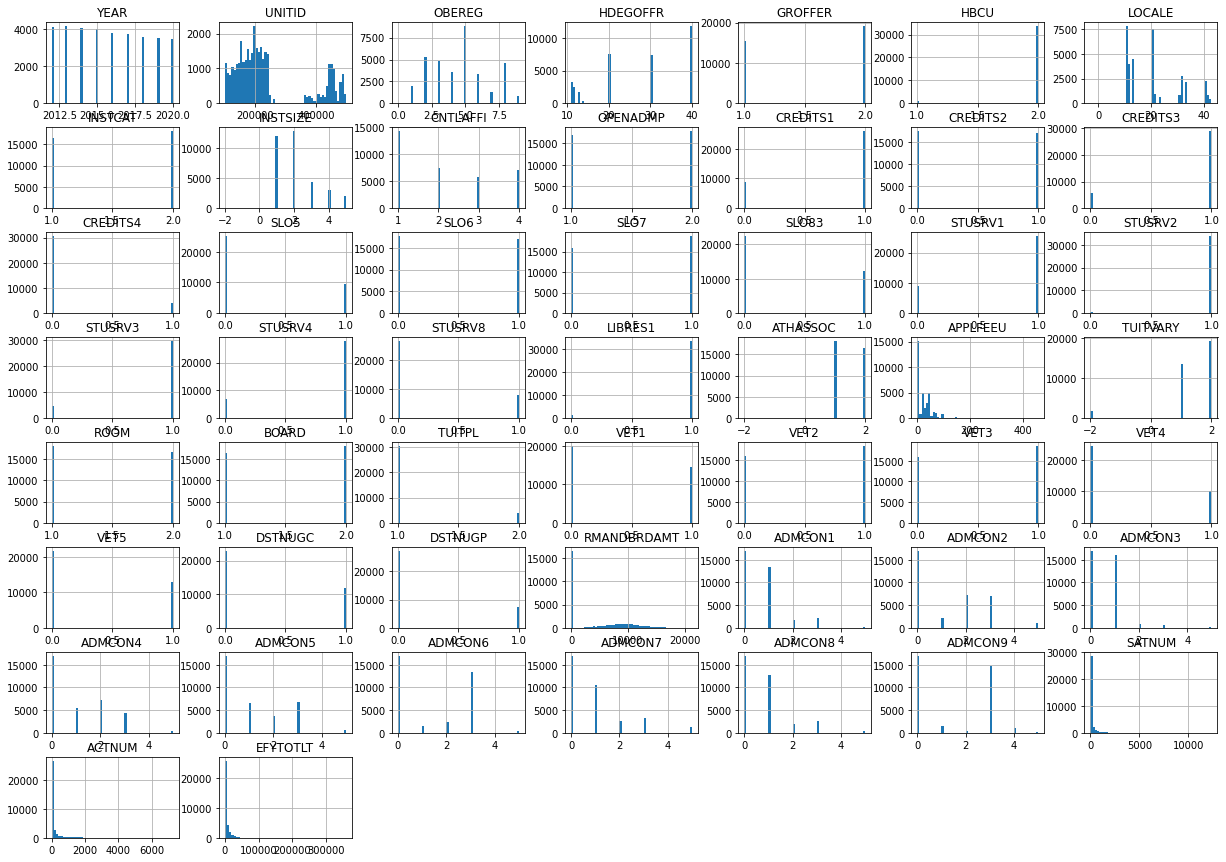

In [ ]:
df.hist(bins=55, figsize=(21,15))
plt.show()

In [ ]:
df['TUITVARY'].value_counts()

 2    19302
 1    13452
-2     1805
Name: TUITVARY, dtype: int64

### Looking at the histograms I realize that one of the variables still needs to be corrected as it contains a "Not Applicable" code: TUITVARY

### We are going to assign  a "NO" to the institutions for which TUITVARY is not applicable since these are institutions that are operating and mainly appear to be college level. 

### Some are  mixed undergraduate and Graduate level institutions but a minority (only 3) 

In [ ]:
colc=['TUITVARY']

for i in colc:
  df[i] = df[i].astype(str)
  df[i] = df[i].map(lambda x: re.sub(r'-2', '2', x))
  df[i] = df[i].astype(int)

In [ ]:
df['INSTSIZE'].value_counts()

# INSTSIZE	1	Under 1,000
# INSTSIZE	2	1,000 - 4,999
# INSTSIZE	3	5,000 - 9,999
# INSTSIZE	4	10,000 - 19,999
# INSTSIZE	5	20,000 and above
# INSTSIZE	-1	Not reported
# INSTSIZE	-2	Not applicable

 2    12903
 1    12151
 3     4404
 4     3077
 5     2008
-1       13
-2        3
Name: INSTSIZE, dtype: int64

In [ ]:
# Slice OUt  -2 and -1 

In [ ]:
df=df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]

In [ ]:
# df['INSTSIZE'].value_counts() # Check 

In [ ]:
df[['OBEREG']].value_counts()

OBEREG
5         8805
2         5272
3         4846
8         4634
4         3533
6         3351
1         1998
7         1276
9          788
0           40
dtype: int64

### Removing CODE 9 = Outlying areas AS FM GU MH MP PR PW VI - (Not in the Continental USA) and CODE = 0 Service Schools 

In [ ]:
df=df.loc[lambda df:((df['OBEREG']!=0)&(df['OBEREG']!=9)),:]

In [ ]:
# df['OBEREG'].value_counts() # Check 

In [ ]:
df[['ATHASSOC']].value_counts()

ATHASSOC
 1          17893
 2          15820
-2              2
dtype: int64

In [ ]:
df=df.loc[lambda df:((df['ATHASSOC']!=-2)),:]

In [ ]:
# df['ATHASSOC'].value_counts() # Check 

In [ ]:
df[['ADMCON7']].value_counts()
# # 0 Not Applicable
# # 1 Required
# # 2 Recommended
# # 3 Neither required nor recommended
# # 4 Do not know
# # 5 Considered but not required


# # ADMCON7 Admission test scores

ADMCON7
0          16525
1          10451
3           3037
2           2481
5           1208
4             11
dtype: int64

In [ ]:
df[['ADMCON8']].value_counts()
# 0 Not Applicable
# 1 Required
# 2 Recommended
# 3 Neither required nor recommended
# 4 Do not know
# 5 Considered but not required


# # ADMCON8 TOEFL (Test of English as a Foreign Language

ADMCON8
0          16525
1          12732
3           2271
2           1846
5            302
4             37
dtype: int64

In [ ]:
df[['ADMCON9']].value_counts()
# 0 Not Applicable
# 1 Required
# 2 Recommended
# 3 Neither required nor recommended
# 4 Do not know
# 5 Considered but not required


# # ADMCON9 Other Test (Wonderlic, WISC-III, etc.)

ADMCON9
0          16525
3          14453
1           1219
4            959
2            433
5            124
dtype: int64

### Reordering the data by Year, UnitID, State, and Institutional Size

In [ ]:
df.sort_values(by=['YEAR','UNITID','STABBR', 'INSTSIZE'], inplace=True)

### Before proceeding let us substitute CODE 11, 12, 13, and 14 with CODE 10 for the 'HDEGOFFR'= Code indicating the highest level of Degree offered by the Academic-Oriented HEI, since all of these codes as indicated above represent a doctorate level degree

In [ ]:
colc=['HDEGOFFR']

for i in colc:
  df[i] = df[i].astype(str)
  df[i] = df[i].map(lambda x: re.sub(r'11', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'12', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'13', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'14', '10', x))
  df[i] = df[i].astype(int)

### Making sure all variables are read a categorical 

In [ ]:
df['UNITID'] = df['UNITID'].astype(str)
df['OBEREG'] = df['OBEREG'].astype(str)
df['HDEGOFFR'] = df['HDEGOFFR'].astype(str)
df['GROFFER'] = df['GROFFER'].astype(str)
df['HBCU'] = df['HBCU'].astype(str)
df['LOCALE'] = df['LOCALE'].astype(str)
df['INSTCAT'] = df['INSTCAT'].astype(str)
df['INSTSIZE'] = df['INSTSIZE'].astype(str)
df['CNTLAFFI'] = df['CNTLAFFI'].astype(str)

df['OPENADMP'] = df['OPENADMP'].astype(str)
df['CREDITS1'] = df['CREDITS1'].astype(str)
df['CREDITS2'] = df['CREDITS2'].astype(str)
df['CREDITS3'] = df['CREDITS3'].astype(str)
df['CREDITS4'] = df['CREDITS4'].astype(str)
df['SLO5'] = df['SLO5'].astype(str)
df['SLO6'] = df['SLO6'].astype(str)
df['SLO7'] = df['SLO7'].astype(str)
df['SLO83'] = df['SLO83'].astype(str)
df['STUSRV1'] = df['STUSRV1'].astype(str)
df['STUSRV2'] = df['STUSRV2'].astype(str)
df['STUSRV3'] = df['STUSRV3'].astype(str)
df['STUSRV4'] = df['STUSRV4'].astype(str)
df['STUSRV8'] = df['STUSRV8'].astype(str)
df['LIBRES1'] = df['LIBRES1'].astype(str)
df['ATHASSOC'] = df['ATHASSOC'].astype(str)
df['TUITVARY'] = df['TUITVARY'].astype(str)
df['ROOM'] = df['ROOM'].astype(str)
df['BOARD'] = df['BOARD'].astype(str)
df['TUITPL'] = df['TUITPL'].astype(str)
df['VET1'] = df['VET1'].astype(str)
df['VET2'] = df['VET2'].astype(str)
df['VET3'] = df['VET3'].astype(str)
df['VET4'] = df['VET4'].astype(str)

df['VET5'] = df['VET5'].astype(str)
df['DSTNUGC'] = df['DSTNUGC'].astype(str)
df['DSTNUGP'] = df['DSTNUGP'].astype(str)
df['ADMCON1'] = df['ADMCON1'].astype(str)

df['ADMCON2'] = df['ADMCON2'].astype(str)
df['ADMCON3'] = df['ADMCON3'].astype(str)
df['ADMCON4'] = df['ADMCON4'].astype(str)
df['ADMCON5'] = df['ADMCON5'].astype(str)
df['ADMCON6'] = df['ADMCON6'].astype(str)
df['ADMCON7'] = df['ADMCON7'].astype(str)
df['ADMCON8'] = df['ADMCON8'].astype(str)
df['ADMCON9'] = df['ADMCON9'].astype(str)


# NUMERICAL: YEAR, APPLFEEU, RMANDBRDAMT, SATNUM, ACTNUM,  EFYTOTLT 

In [ ]:
# (34559, 53)
df.shape

(33713, 53)

### Removing the outliers based on Total Enrolment Numbers

In [ ]:
def remove_outlier(df_name, col_name):
    q1 = df_name[col_name].quantile(0.25)
    q3 = df_name[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_name = df_name.loc[(df_name[col_name] > fence_low) & (df_name[col_name] < fence_high),:]
    df_name= df_name.copy(deep=False)
    print(df_name.shape)
    return df_name

# remove_outlier(df, 'EFYTOTLT')
# df=df_name.copy(deep=False)

# df_NOA=df.loc[lambda df:(df['OPENADMP']!=1),:].copy(False)


In [ ]:
df=remove_outlier(df, 'EFYTOTLT')

(30177, 53)


In [ ]:
df.shape

(30177, 53)

### Creating a proportions column for SAT and ACT reported numbers (Numbers of reported scores in proportion to total enrollment for each HEI)

In [ ]:
# df['SAT_RATIOS']=round(df['SATNUM']/df['EFYTOTLT'],2)
# df['ACT_RATIOS']=round(df['ACTNUM']/df['EFYTOTLT'],2)
df['PROP_SATNUM']=round(((df['SATNUM']/df['EFYTOTLT'])*100), 2)
df['PROP_ACTNUM']=round(((df['ACTNUM']/df['EFYTOTLT'])*100), 2)

# df.tail()

### Creating a comparison column where the code indicates if the Proporion of ACT and SAT reported is:
- not present code = 0
- up to 10% code = 1
- between 10% and 20% code = 2
- between 20% and 30% code = 3 
- between 30% and 40% code = 4
- over 40%  code = 5 

In [ ]:

sats = (df['PROP_SATNUM'].values)
acts= (df['PROP_ACTNUM'].values)

ratios_sat = []
ratios_act = []

for i in range (len(sats)):
  if 0< sats[i] <10:
    ratios_sat.append(1)
  elif 10<= sats[i] <20:
    ratios_sat.append(2)
  elif 20<= sats[i] <30:
    ratios_sat.append(3)
  elif 30<= sats[i] <40:
    ratios_sat.append(4)
  elif 40<= sats[i]:
    ratios_sat.append(5)
  elif sats[i]==0:
    ratios_sat.append(0)    
# 
for i in range (len(acts)):
  if 0< acts[i] <10:
    ratios_act.append(1)
  elif 10<= acts[i] <20:
    ratios_act.append(2)
  elif 20<= acts[i] <30:
    ratios_act.append(3)
  elif 30<= acts[i] <40:
    ratios_act.append(4)
  elif 40<= acts[i]:
    ratios_act.append(5)
  elif acts[i]==0:
    ratios_act.append(0)
df['SAT_ENROL'] = ratios_sat 
df['ACT_ENROL'] = ratios_act 
df.head()  

,YEAR,UNITID,STABBR,INSTNM,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,...,ADMCON7,ADMCON8,ADMCON9,SATNUM,ACTNUM,EFYTOTLT,PROP_SATNUM,PROP_ACTNUM,SAT_ENROL,ACT_ENROL
4020,2012,100654,AL,Alabama A & M University,5,10,1,1,12,2,...,1,1,3,113,820,4582,2.47,17.90,1,2
4021,2012,100663,AL,University of Alabama at Birmingham,5,10,1,2,12,2,...,1,3,3,79,1500,12962,0.61,11.57,1,2
4022,2012,100690,AL,Amridge University,5,10,1,2,12,2,...,0,0,0,0,0,522,0.00,0.00,0,0
4023,2012,100706,AL,University of Alabama in Huntsville,5,10,1,2,12,2,...,1,1,3,120,581,6983,1.72,8.32,1,1
4024,2012,100724,AL,Alabama State University,5,10,1,1,12,2,...,1,1,3,203,972,5541,3.66,17.54,1,2


### Here creating a column that sets a High Enrollment marker based on institutional size and overall enrollment per year per HEI

In [ ]:
 df['INSTSIZE'].value_counts()

2    12500
1    11805
3     4260
4     1518
5       94
Name: INSTSIZE, dtype: int64

### Splitting the data  between High and Low enrollment allows us to try to apply a logistic regression to our data 

In [ ]:
# , stats

vals = df['INSTSIZE'].values
sizes =[]

for  x in vals:
  if x=='3':
      # print(x)
    sizes.append(7499.5)
  elif x=='1':
    sizes.append(500.5)
  elif x=='2':
    sizes.append(2999.5)
  elif x=='4':
    sizes.append(14999.5)
  elif x=='5':
    sizes.append(28398)
  # print(sizes)
df['CLASS_MIDDLE'] = sizes

enrols = df['EFYTOTLT'].values


# print(enrols.size)
compares = (df['CLASS_MIDDLE'].values)

# TO CREATE TWO CLASSES FOR ENROLLMENT One HIGH ABOVE 85% The other LOW BELOW 85%
compares2 = (df['CLASS_MIDDLE'].values)*0.85

# # TO DIVIDE ENROLLMENT IN THREE CLASSES:
# compares2_low = (df['CLASS_MIDDLE'].values)*0.50
# compares2_middle = (df['CLASS_MIDDLE'].values)*0.85

ratios = []

# # CREATES A MULTICLASS ENROLMENT CATEGORY LOW = code 0, MIDDLE  code=1; HIGH code = 2 

# for i in range (len(enrols)):
#   if enrols[i] <= compares2_low[i]:
#     ratios.append(0)
#   elif enrols[i] > compares2_low[i]:
#     if enrols[i] < compares2_middle[i]:
#       ratios.append(1)
#     else:
#       ratios.append(2)

    

# df['HIGH_ENROL'] = ratios
# df.tail()  

for i in range (len(enrols)):
  if enrols[i] > compares2[i]:
    ratios.append(1)
  else:
    ratios.append(0)
df['HIGH_ENROL'] = ratios
df.tail()  

# df.drop(['EFYTOTLT','SIZES'], axis=1, inplace=True)
# # df_2020cl.drop(['SIZES'], axis=1, inplace=True)

# INSTSIZE	1	Under 1,000 = 501 USED: 500.5
# INSTSIZE	2	1,000 - 4,999 = 3000 USED: 2999.5
# INSTSIZE	3	5,000 - 9,999 = 7500 USED: 7499.5
# INSTSIZE	4	10,000 - 19,999 = 15000 USED: 14999.5
# INSTSIZE	5	20,000 and above USED:

,YEAR,UNITID,STABBR,INSTNM,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,...,ADMCON9,SATNUM,ACTNUM,EFYTOTLT,PROP_SATNUM,PROP_ACTNUM,SAT_ENROL,ACT_ENROL,CLASS_MIDDLE,HIGH_ENROL
34554,2020,495925,CA,San Joaquin Valley College-Madera,8,40,2,2,13,1,...,0,0,0,182,0.0,0.0,0,0,500.5,0
34555,2020,495934,CA,San Joaquin Valley College-Delano,8,40,2,2,23,1,...,0,0,0,192,0.0,0.0,0,0,500.5,0
34556,2020,495952,CA,San Joaquin Valley College-Rancho Mirage,8,40,2,2,21,1,...,0,0,0,67,0.0,0.0,0,0,500.5,0
34557,2020,495961,CA,San Joaquin Valley College-Santa Maria,8,40,2,2,12,1,...,0,0,0,51,0.0,0.0,0,0,500.5,0
34558,2020,496186,CA,California Institute of Arts & Technology-Nati...,8,40,2,2,21,1,...,0,0,0,383,0.0,0.0,0,0,500.5,0


In [ ]:
df.columns

Index(['YEAR', 'UNITID', 'STABBR', 'INSTNM', 'OBEREG', 'HDEGOFFR', 'GROFFER',
       'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP',
       'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7',
       'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8',
       'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD',
       'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP',
       'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5',
       'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM',
       'EFYTOTLT', 'PROP_SATNUM', 'PROP_ACTNUM', 'SAT_ENROL', 'ACT_ENROL',
       'CLASS_MIDDLE', 'HIGH_ENROL'],
      dtype='object')

In [ ]:
df['OPENADMP'].value_counts()
# 'OPENADMP' = Code indicating whether the HEI adopts an Open Enrollment Policy or not
# 1 = Yes
# 2 = No

2    15706
1    14471
Name: OPENADMP, dtype: int64

In [ ]:
# # df.groupby['INSTSIZE']['EFYTOTLT'].sum()
# sum_by_instsize = (df.groupby('INSTSIZE')['EFYTOTLT'].sum()).reset_index()
# sum_by_instsize
# # sum_by_supplier = (df.groupby('Supplier Name')['Invoice Value'].sum()).reset_index()

In [ ]:
df['HIGH_ENROL'].value_counts()

1    16725
0    13452
Name: HIGH_ENROL, dtype: int64

In [ ]:
df['LOCALE'].value_counts()

11    6506
21    6403
13    3808
12    3251
32    2614
41    2204
33    2090
22     808
42     805
31     737
23     525
43     426
Name: LOCALE, dtype: int64

In [ ]:
colc=['LOCALE']

for i in colc:
  df[i] = df[i].astype(str)
  df[i] = df[i].map(lambda x: re.sub(r'11', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'12', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'13', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'14', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'21', '20', x))
  df[i] = df[i].map(lambda x: re.sub(r'22', '20', x))
  df[i] = df[i].map(lambda x: re.sub(r'23', '20', x))
  df[i] = df[i].map(lambda x: re.sub(r'31', '30', x))
  df[i] = df[i].map(lambda x: re.sub(r'32', '30', x))
  df[i] = df[i].map(lambda x: re.sub(r'33', '30', x))
  df[i] = df[i].map(lambda x: re.sub(r'41', '40', x))
  df[i] = df[i].map(lambda x: re.sub(r'42', '40', x))
  df[i] = df[i].map(lambda x: re.sub(r'43', '40', x))
  df[i] = df[i].astype(str)

In [ ]:
# df.drop(['SATNUM','ACTNUM', 'CLASS_MIDDLE', 'PROP_SATNUM','PROP_ACTNUM'],axis=1,inplace=True)
# df.drop(['EFYTOTLT','SATNUM','ACTNUM', 'CLASS_MIDDLE', 'PROP_SATNUM','PROP_ACTNUM'],axis=1,inplace=True)

# df.drop([ 'PROP_SATNUM','PROP_ACTNUM'],axis=1,inplace=True)

df['SAT_ENROL']=df['SAT_ENROL'].astype(str)
df['ACT_ENROL']=df['ACT_ENROL'].astype(str)
df['HIGH_ENROL']=df['HIGH_ENROL'].astype(str)


In [ ]:
df.head().T

,4020,4021,4022,4023,4024
YEAR,2012,2012,2012,2012,2012
UNITID,100654,100663,100690,100706,100724
STABBR,AL,AL,AL,AL,AL
INSTNM,Alabama A & M University,University of Alabama at Birmingham,Amridge University,University of Alabama in Huntsville,Alabama State University
OBEREG,5,5,5,5,5
HDEGOFFR,10,10,10,10,10
GROFFER,1,1,1,1,1
HBCU,1,2,2,2,1
LOCALE,10,10,10,10,10
INSTCAT,2,2,2,2,2


### Slicing out institutions with open admissions altogether from our DF 

In [ ]:
df_1=df.loc[lambda df:(df['OPENADMP']!=1),:].copy(deep=False)
#  'OPENADMP' = Code indicating whether the HEI adopts an Open Enrollment Policy or not	
# 	 1 = Yes adopt open enrollment policy 
# 	 2 = No

# **Testing - Time Series Analysis on Numerical Features Only **

In [ ]:
df_NUM = df_1[['YEAR','UNITID','APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT']].copy(deep=False)
df_NUM.head()
# CREATING DF with ONLY Numerical Variables from our data 

,YEAR,UNITID,APPLFEEU,RMANDBRDAMT,SATNUM,ACTNUM,EFYTOTLT
4020,2012,100654,30,10119,113,820,4582
4021,2012,100663,30,9294,79,1500,12962
4022,2012,100690,50,0,0,0,522
4023,2012,100706,30,8070,120,581,6983
4024,2012,100724,25,4600,203,972,5541


In [ ]:
# https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# https://towardsdatascience.com/advanced-time-series-analysis-in-python-decomposition-autocorrelation-115aa64f475e
# https://www.kaggle.com/code/kashnitsky/topic-9-part-1-time-series-analysis-in-python
# https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/

# Time Series ARticles 

df_NUM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30177 entries, 4020 to 34558
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   YEAR         30177 non-null  int64 
 1   UNITID       30177 non-null  object
 2   APPLFEEU     30177 non-null  int64 
 3   RMANDBRDAMT  30177 non-null  int64 
 4   SATNUM       30177 non-null  int64 
 5   ACTNUM       30177 non-null  int64 
 6   EFYTOTLT     30177 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.8+ MB


In [ ]:
df_NUM.columns

Index(['YEAR', 'UNITID', 'APPLFEEU', 'RMANDBRDAMT', 'SATNUM', 'ACTNUM',
       'EFYTOTLT'],
      dtype='object')

In [ ]:
# raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
df_NUM['YEAR'] =  pd.to_datetime(df_NUM['YEAR'], format='%Y')

In [ ]:
# df_NUM['YEAR'] = pd.to_datetime(df_NUM.YEARe , format = '%d/%m/%Y %H.%M.%S')
# data = df.drop(['Date_Time'], axis=1)
# data.index = df.Date_Time
# df_NUM['YEAR'] = pd.to_datetime(df_NUM.YEAR , format = '%Y')
# data = df_NUM.drop(['YEAR'], axis=1)
# data.index = df_NUM.YEAR
# data

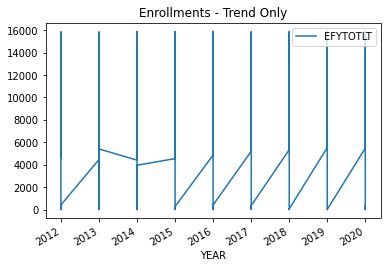

In [ ]:
# fig, axes = plt.subplots(figsize=(18,9))
# pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

data = df_NUM[['YEAR','EFYTOTLT',]]
data.plot(x='YEAR', y='EFYTOTLT',title='Enrollments - Trend Only', legend=True)
# df_NUM.plot(x='YEAR', y='APPLFEEU',title='Application Fees - Trend Only', legend=True,ax=axes[0,1])
# df_NUM.plot(x='YEAR', y='RMANDBRDAMT',title='Room & Board Fees - Trend Only', legend=True,ax=axes[0,2])
# df_NUM.plot(x='YEAR', y='SATNUM',title='SAT Numbers - Trend Only', legend=True,ax=axes[1,0])
# df_NUM.plot(x='YEAR', y='ACTNUM',title='ACT Numbers - Trend Only', legend=True,ax=axes[1,1])
# fig.tight_layout(pad=3.0)
plt.show()
# fig, axes = plt.subplots(figsize=(20,4), dpi=100)

# data = df_NUM[['YEAR','EFYTOTLT',]]
# data.plot(x='YEAR', y='EFYTOTLT', title='Trend Only', legend=True)

# THE Data seems problematic around the years 2013 and 2014 and 2014-2015

### The numerical data pertaining to our HEIs appears to be fairly stationary - There is a reating patterm per year without significant changes (with some exceptions)  

In [ ]:
# https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638

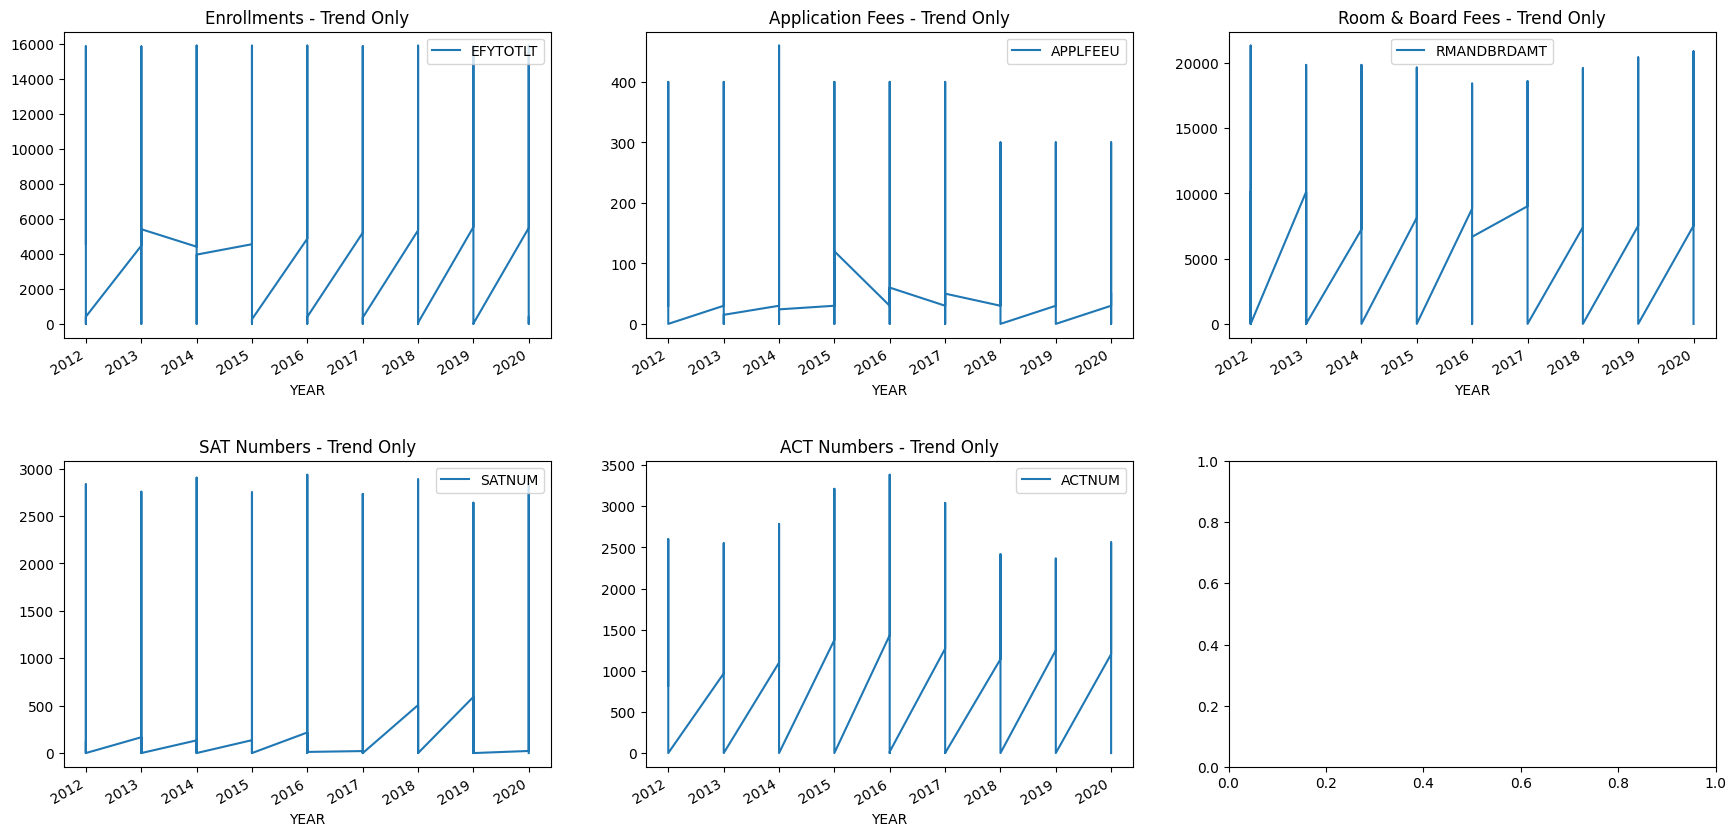

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(18,9), dpi=100)
# pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

# data = df_NUM[['YEAR','EFYTOTLT',]]
df_NUM.plot(x='YEAR', y='EFYTOTLT',title='Enrollments - Trend Only', legend=True,ax=axes[0,0])
df_NUM.plot(x='YEAR', y='APPLFEEU',title='Application Fees - Trend Only', legend=True,ax=axes[0,1])
df_NUM.plot(x='YEAR', y='RMANDBRDAMT',title='Room & Board Fees - Trend Only', legend=True,ax=axes[0,2])
df_NUM.plot(x='YEAR', y='SATNUM',title='SAT Numbers - Trend Only', legend=True,ax=axes[1,0])
df_NUM.plot(x='YEAR', y='ACTNUM',title='ACT Numbers - Trend Only', legend=True,ax=axes[1,1])
fig.tight_layout(pad=3.0)
plt.show()
# fig, axes = plt.subplots(figsize=(20,4), dpi=100)

# data = df_NUM[['YEAR','EFYTOTLT',]]
# data.plot(x='YEAR', y='EFYTOTLT', title='Trend Only', legend=True)

# THE Data seems problematic around the years 2013 and 2014 and 2014-2015

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30177 entries, 4020 to 34558
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   YEAR      30177 non-null  datetime64[ns]
 1   EFYTOTLT  30177 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 707.3 KB


In [ ]:
data.set_index('YEAR', inplace=True)

In [ ]:
data.index

DatetimeIndex(['2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01',
               ...
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='YEAR', length=30177, freq=None)

In [ ]:

# # import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
 
# # General routine for plotting time series data
# def plot_timeseries_df(df, attrib, ticker_loc=1, title='Timeseries', 
#                        legend=''):
#     fig = plt.figure(figsize=(15,7))
#     plt.plot(data[attrib], 'o-')
#     _ = plt.xticks(rotation=90)
#     plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(ticker_loc))
#     plt.title(title)
#     plt.gca().legend(legend)
#     plt.show()
 
# plot_timeseries_df(data, "EFYTOTLT",
#                    ticker_loc=3, title="Students Enrolled", legend=True)

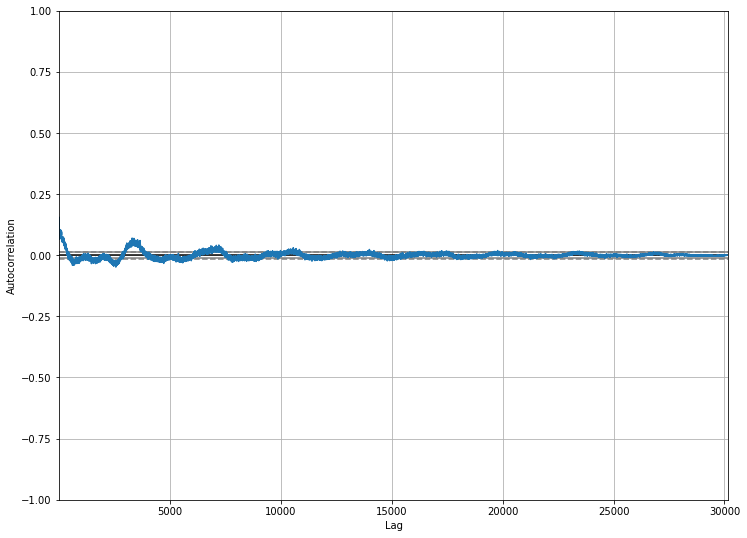

In [ ]:
# from pandas import read_csv
# from pandas import datetime
# from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')
 
# series = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# data.drop(['UNITID'], axis=1)
plt.figure(figsize=(12,9))
series_data = pd.Series(data = data['EFYTOTLT'])
autocorrelation_plot(series_data)
plt.show()

In [ ]:
data.head()

,EFYTOTLT
YEAR,
2012-01-01,4582
2012-01-01,12962
2012-01-01,522
2012-01-01,6983
2012-01-01,5541


In [ ]:
# data.set_index('YEAR', inplace=True)

In [ ]:
# data.info()

In [ ]:
# data.index

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [ ]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)



In [ ]:
adf_test(data["EFYTOTLT"])

Results of Dickey-Fuller Test:
Test Statistic                -1.258895e+01
p-value                        1.839239e-23
#Lags Used                     5.100000e+01
Number of Observations Used    3.012500e+04
Critical Value (1%)           -3.430567e+00
Critical Value (5%)           -2.861636e+00
Critical Value (10%)          -2.566821e+00
dtype: float64


### The data regarding Student Enrollment does not appear to be correlated and we find confirmation of this both from the graph befow and from calculating the correlation coefficient 

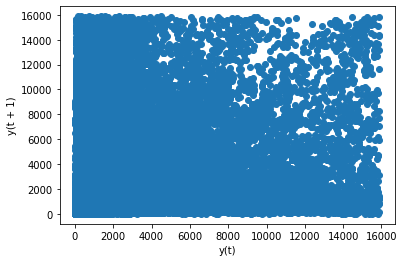

In [ ]:
# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/#:~:text=Autoregression%20is%20a%20time%20series,range%20of%20time%20series%20problems.
# https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638
# https://www.statology.org/dickey-fuller-test-python/
# https://machinelearningmastery.com/time-series-data-stationary-python/

from pandas.plotting import lag_plot
# 
lag_plot(data["EFYTOTLT"])
plt.show()

In [ ]:
# Peason's correlation between Students Enrollment Values

values = pd.DataFrame(data["EFYTOTLT"])
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.15165
t+1  0.15165  1.00000


### Performing the Augmented Dickey Fuller test on our Students' Enrollment data, the time series appears to be stationary since the p-value is very low 

### The test statistic's value (the first value returned) is -12 and the p-value is practically zero

In [ ]:
# adfuller(data['EFYTOTLT'])

### Let us take a look at the correlation existing between the numerical variables - 
### The objective is to try to understand how the variables affect each other over time - checking Pearson's correlation can give us some information 

### The low values  of correlation between the variables confirm that the variables are fairly independent from each other and do not affect each other greatly - they would not represent useful tools to try to leverage increases in enrollment by HEIs
### Suprosongly even the cost of Room and Board does not seem to be particularly correlated with total number of students enrolled - this may be linked to the fact that we are  analyzing only - non-open admission schools and undergraduate level students who tend to be lurred to schools based on other factors it seems.

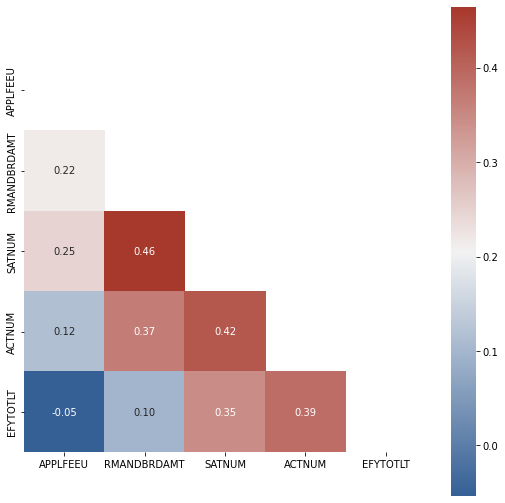

In [ ]:
# https://towardsdatascience.com/advanced-time-series-analysis-in-python-decomposition-autocorrelation-115aa64f475e
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = df_NUM.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

In [ ]:
df_NUM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30177 entries, 4020 to 34558
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   YEAR         30177 non-null  datetime64[ns]
 1   UNITID       30177 non-null  object        
 2   APPLFEEU     30177 non-null  int64         
 3   RMANDBRDAMT  30177 non-null  int64         
 4   SATNUM       30177 non-null  int64         
 5   ACTNUM       30177 non-null  int64         
 6   EFYTOTLT     30177 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.8+ MB


In [ ]:
# df_NUM.set_index('YEAR', inplace=True)

### Rescaling the data only makes the stationarity of the data more apparent 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


Scaled Dataset Using RobustScaler
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33970 entries, 0 to 34558
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   YEAR         30177 non-null  datetime64[ns]
 1   EFYTOTLT     30177 non-null  float64       
 2   APPLFEEU     30177 non-null  float64       
 3   RMANDBRDAMT  30177 non-null  float64       
 4   SATNUM       30177 non-null  float64       
 5   ACTNUM       30177 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.8 MB


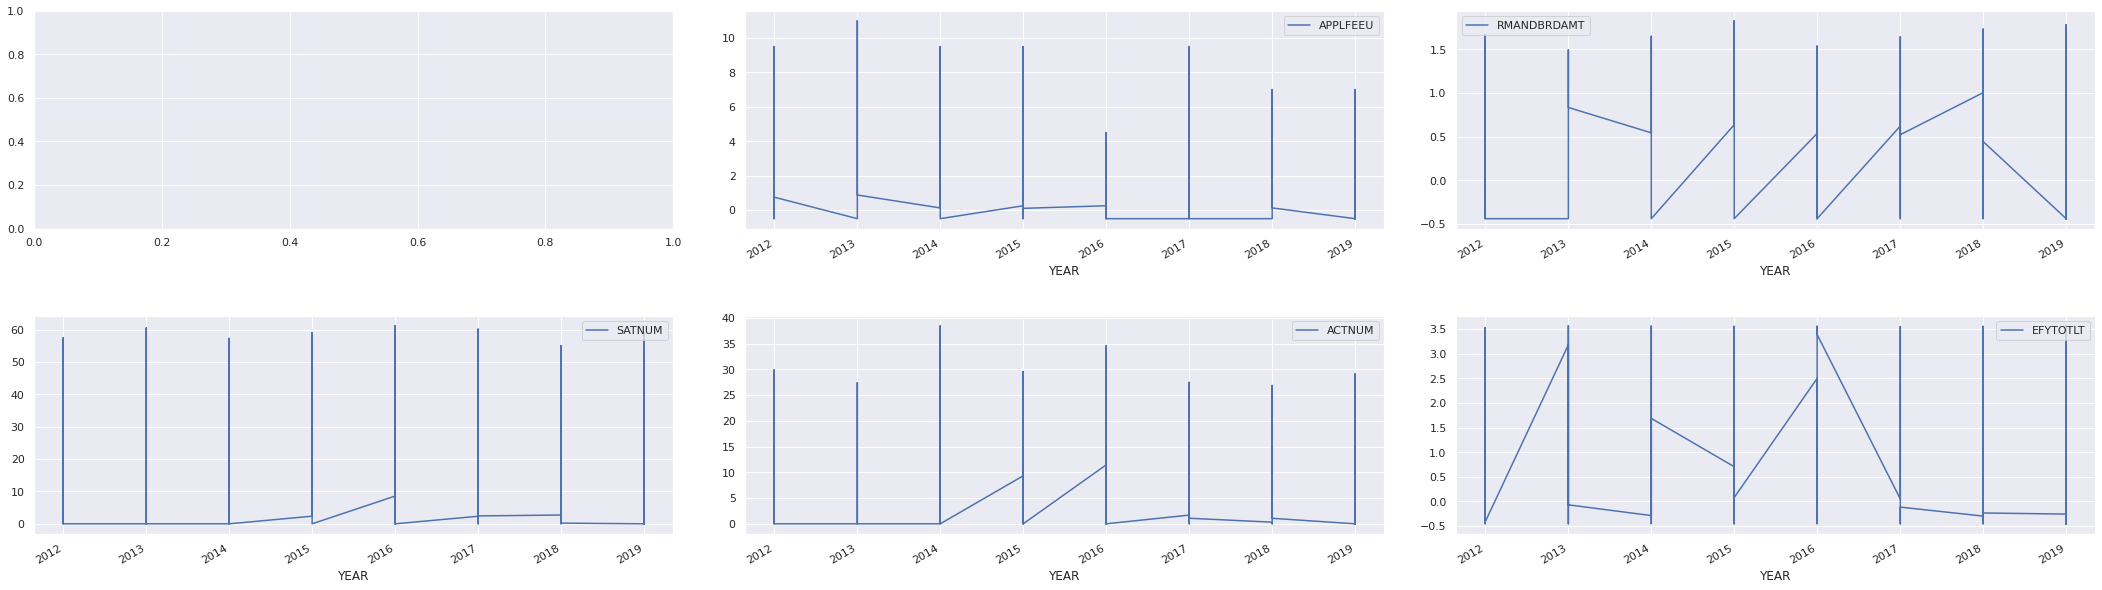

In [ ]:

data = df_NUM[['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']]

 
robust_scaler = RobustScaler()
 
df_scaled = robust_scaler.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT'])

df_scaled = pd.concat((df_scaled, df_NUM.YEAR), 1)
 
print("Scaled Dataset Using RobustScaler")

df_scaled = df_scaled.reindex(columns=['YEAR','EFYTOTLT','APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM'])
# df_scaled.head()
df_scaled.info()



sns.set(rc = {'figure.figsize':(30,9)})

# data1 = df_scaled.loc[:, ['YEAR']]
data2 = df_scaled.loc[:, ['YEAR','APPLFEEU']]
data3 = df_scaled.loc[:, ['YEAR','RMANDBRDAMT']]
data4 = df_scaled.loc[:, ['YEAR','SATNUM']]
data5 = df_scaled.loc[:, ['YEAR','ACTNUM']]
data6 = df_scaled.loc[:, ['YEAR','EFYTOTLT']]


fig, axes = plt.subplots(2, 3)

# data1.hist('YEAR', ax=axes[0,0])
data2.plot('YEAR','APPLFEEU', ax=axes[0,1])
data3.plot('YEAR','RMANDBRDAMT', ax=axes[0,2])
data4.plot('YEAR','SATNUM', ax=axes[1,0])
data5.plot('YEAR','ACTNUM', ax=axes[1,1])
data6.plot('YEAR','EFYTOTLT', ax=axes[1,2])
fig.tight_layout(pad=3.0)
plt.show()

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams


In [ ]:
df_scaled.head()

,YEAR,EFYTOTLT,APPLFEEU,RMANDBRDAMT,SATNUM,ACTNUM
0,2015-01-01,0.703976,0.250,0.635000,2.354167,9.318182
1,2015-01-01,2.826032,0.250,0.547234,1.645833,17.045455
2,2015-01-01,-0.324133,0.750,-0.441489,0.000000,0.000000
3,2015-01-01,1.311978,0.250,0.417021,2.500000,6.602273
4,2015-01-01,0.946822,0.125,0.047872,4.229167,11.045455


### This second graph is supposed to capture how the various "seasonality" (here, changes over time) of the various variables affect each other. It is a  CLuster Map highlighting how each variable affects the other. 
###  Again it is apparent that there is little influence between the numerical values part of our data-set
### WHat does the data tell us? 
### Well it seems to indicate that HEIs who receive the most number of reported SAT scores also receive greater numbers of ACT Scores and tend to be more expensive institutions. They tend to allure greater number of enrollees but this may be an indication of the fact that they can  also represent the more exclusive HEIs or the HEIs with greater demand of services. 
### Finally, application fees seem to matter the least in determining final enrollment decisions.

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


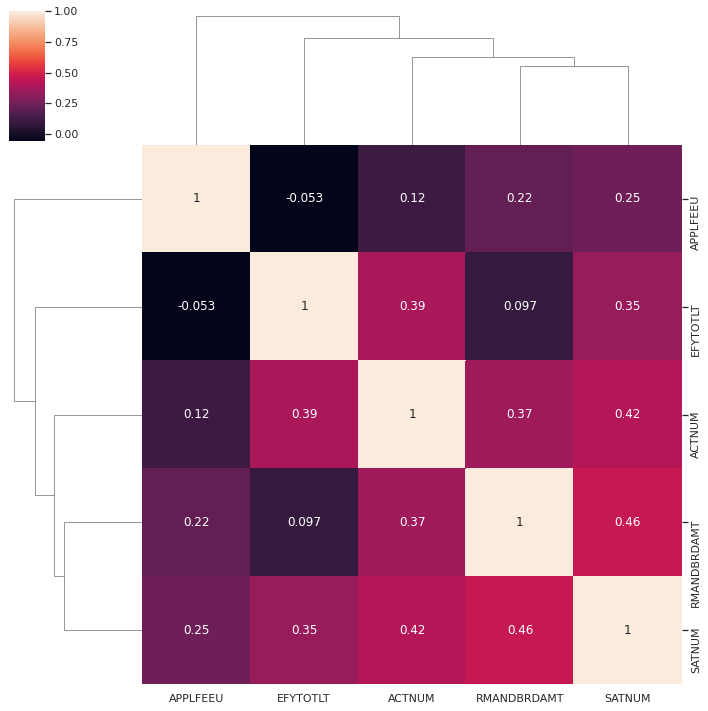

In [ ]:
# There is very limited correlation between the numerical features and the correlation that is present does not make a whole lot of logical sense  

# Compute corr matrix
vars_corr = pd.DataFrame(df_scaled).corr()

sns.clustermap(vars_corr, annot=True, square=True)
plt.show();

In [ ]:
df_NUM.head()

,YEAR,UNITID,APPLFEEU,RMANDBRDAMT,SATNUM,ACTNUM,EFYTOTLT
4020,2012-01-01,100654,30,10119,113,820,4582
4021,2012-01-01,100663,30,9294,79,1500,12962
4022,2012-01-01,100690,50,0,0,0,522
4023,2012-01-01,100706,30,8070,120,581,6983
4024,2012-01-01,100724,25,4600,203,972,5541


### Autocorrelation Plot 

In [ ]:
df_NUM.set_index('YEAR', inplace=True)

In [ ]:
# from pandas.plotting import autocorrelation_plot
# # df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
# data = df_NUM[['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']]
# # Draw Plot
# plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
# autocorrelation_plot(data.values.tolist())

In [ ]:
# data.head()

In [ ]:
# from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# # Calculate ACF and PACF upto 50 lags
# # acf_50 = acf(df.value, nlags=50)
# # pacf_50 = pacf(df.value, nlags=50)

# # Draw Plot
# fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
# plot_acf(data.values.flatten(), ax=axes[0])
# plot_pacf(data.values.flatten(), ax=axes[1])

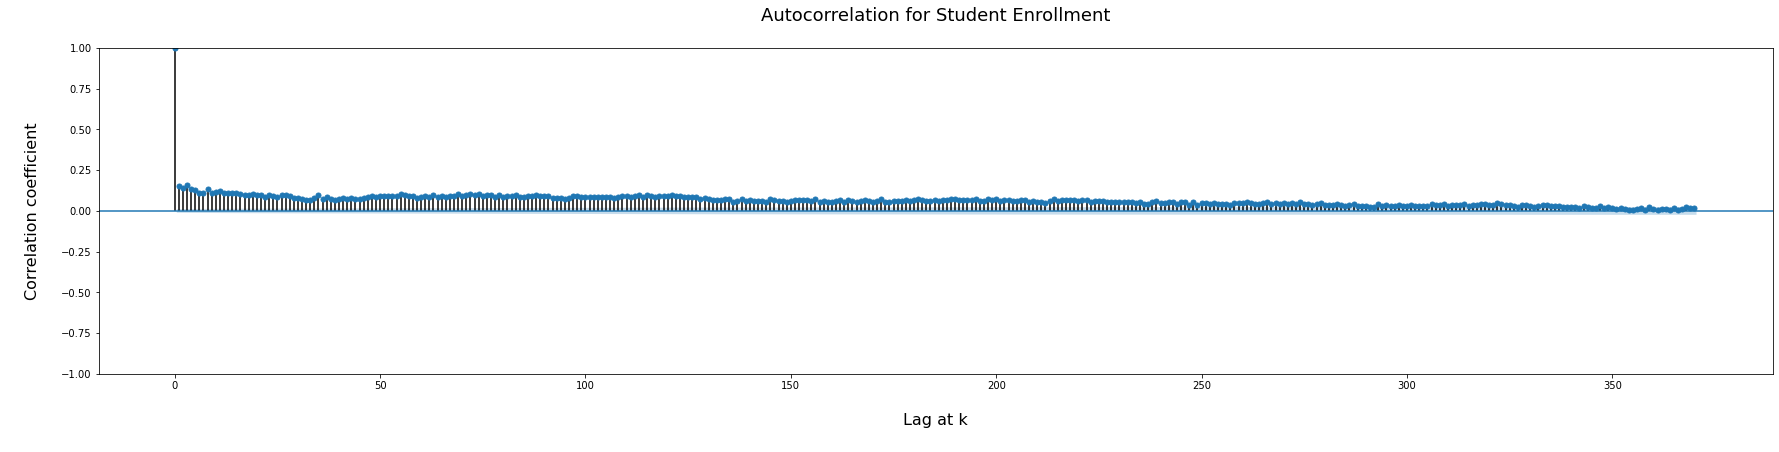

In [ ]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 30, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(df_NUM["EFYTOTLT"], lags=370)

plt.title('Autocorrelation for Student Enrollment\n', fontsize=18)
plt.xlabel("\nLag at k\n", fontsize=16)
plt.ylabel("\nCorrelation coefficient\n", fontsize=16)
plt.show()

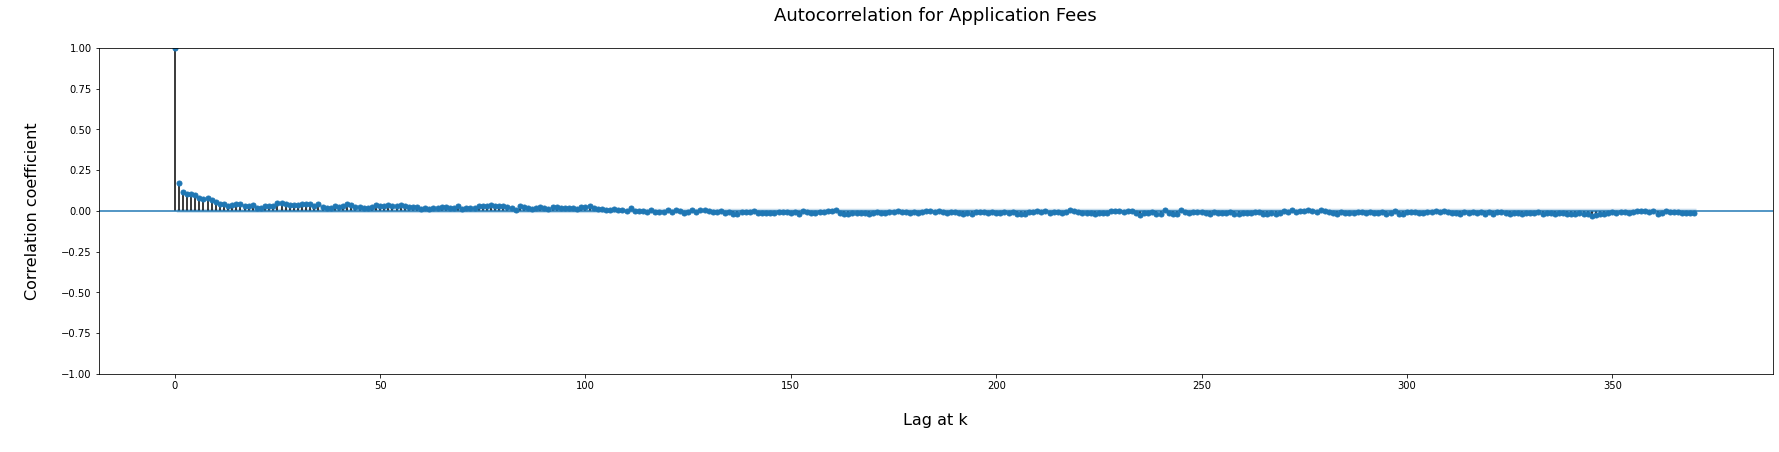

In [ ]:
# from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 30, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(df_NUM["APPLFEEU"], lags=370)

plt.title('Autocorrelation for Application Fees\n', fontsize=18)
plt.xlabel("\nLag at k\n", fontsize=16)
plt.ylabel("\nCorrelation coefficient\n", fontsize=16)
plt.show()

In [ ]:
# from statsmodels.graphics import tsaplots

# rcParams["figure.figsize"] = 30, 6

# # Stands for Time Series Analysis Plots (TSA Plots)
# fig = tsaplots.plot_acf(df_scaled["RMANDBRDAMT"], lags=15)

# plt.xlabel("Lag at k")
# plt.ylabel("Correlation coefficient")
# plt.show()

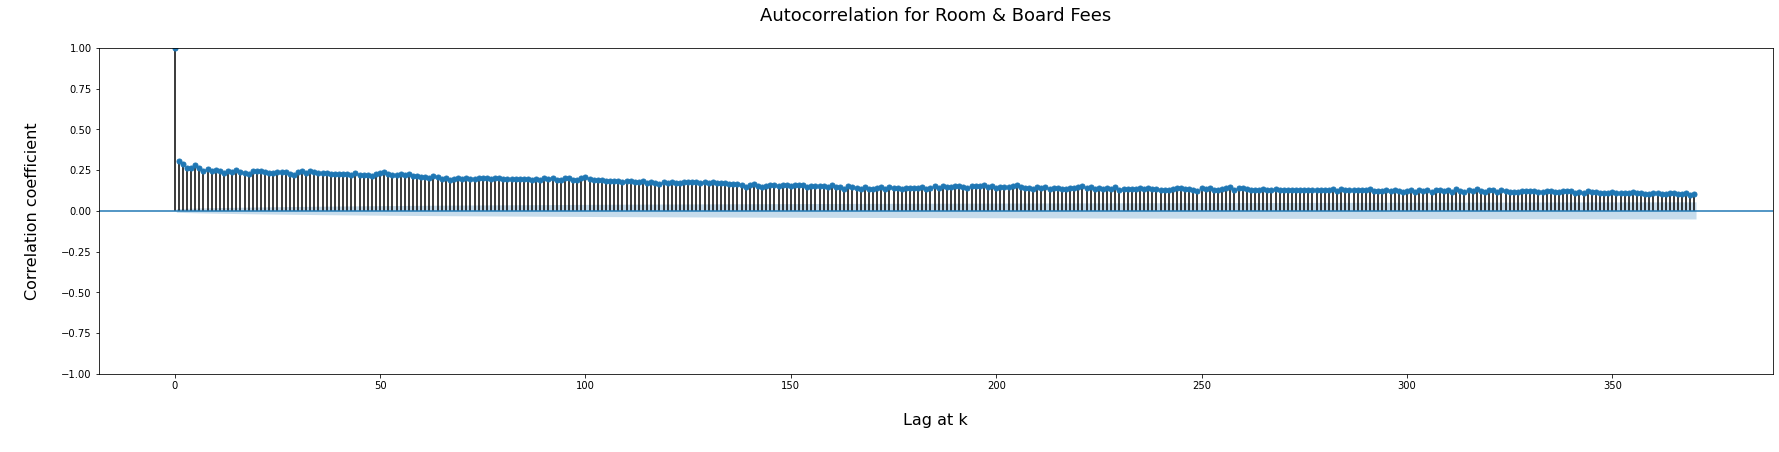

In [ ]:
# from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 30, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(df_NUM["RMANDBRDAMT"], lags=370)

plt.title('Autocorrelation for Room & Board Fees\n', fontsize=18)
plt.xlabel("\nLag at k\n", fontsize=16)
plt.ylabel("\nCorrelation coefficient\n", fontsize=16)
plt.show()

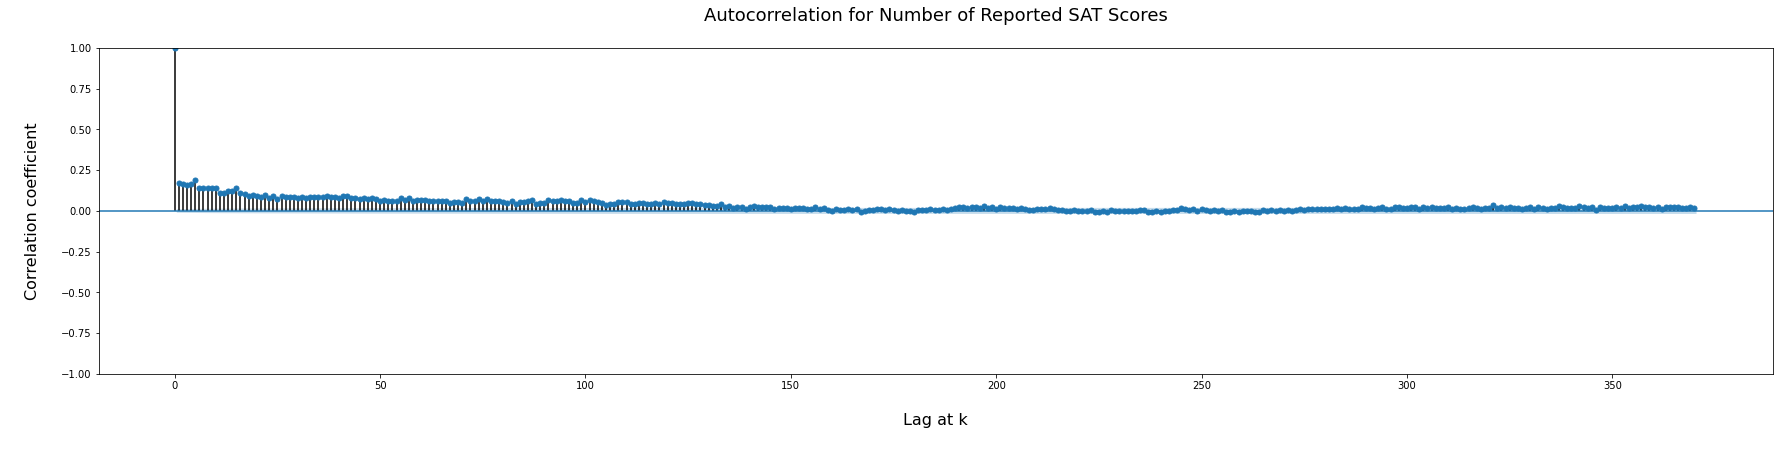

In [ ]:
# from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 30, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(df_NUM["SATNUM"], lags=370)

plt.title('Autocorrelation for Number of Reported SAT Scores\n', fontsize=18)
plt.xlabel("\nLag at k\n", fontsize=16)
plt.ylabel("\nCorrelation coefficient\n", fontsize=16)
plt.show()

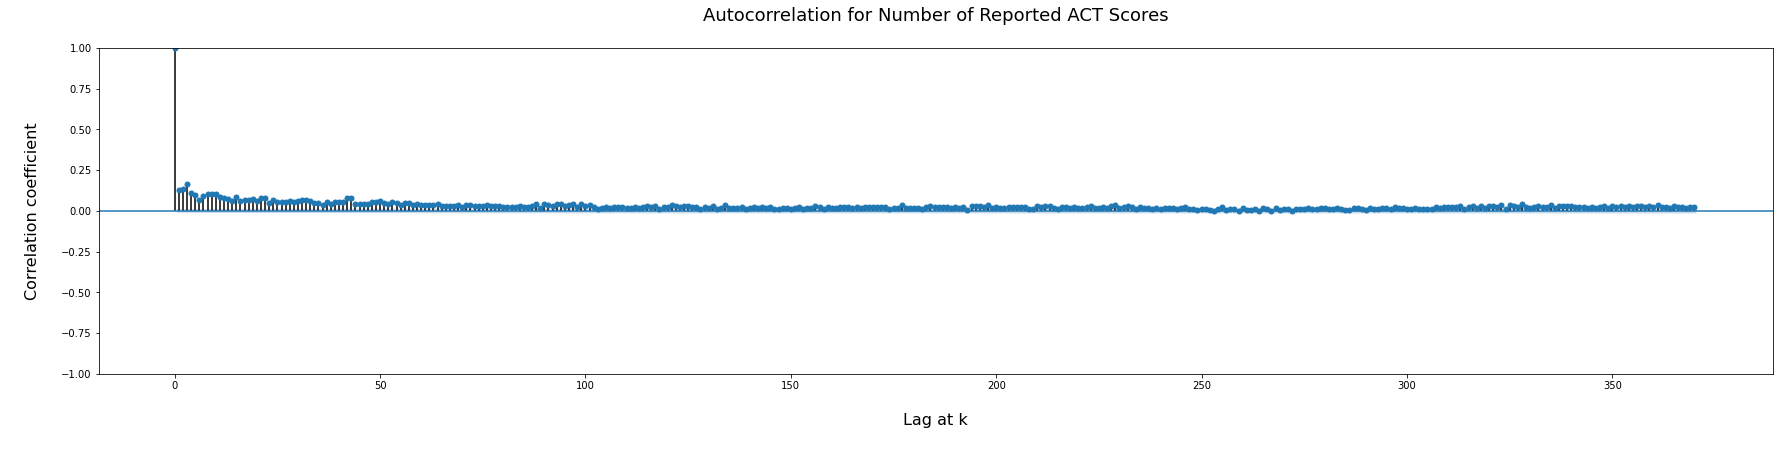

In [ ]:
# from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 30, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(df_NUM["ACTNUM"], lags=370)

plt.title('Autocorrelation for Number of Reported ACT Scores\n', fontsize=18)
plt.xlabel("\nLag at k\n", fontsize=16)
plt.ylabel("\nCorrelation coefficient\n", fontsize=16)
plt.show()

In [ ]:
# df_scaled

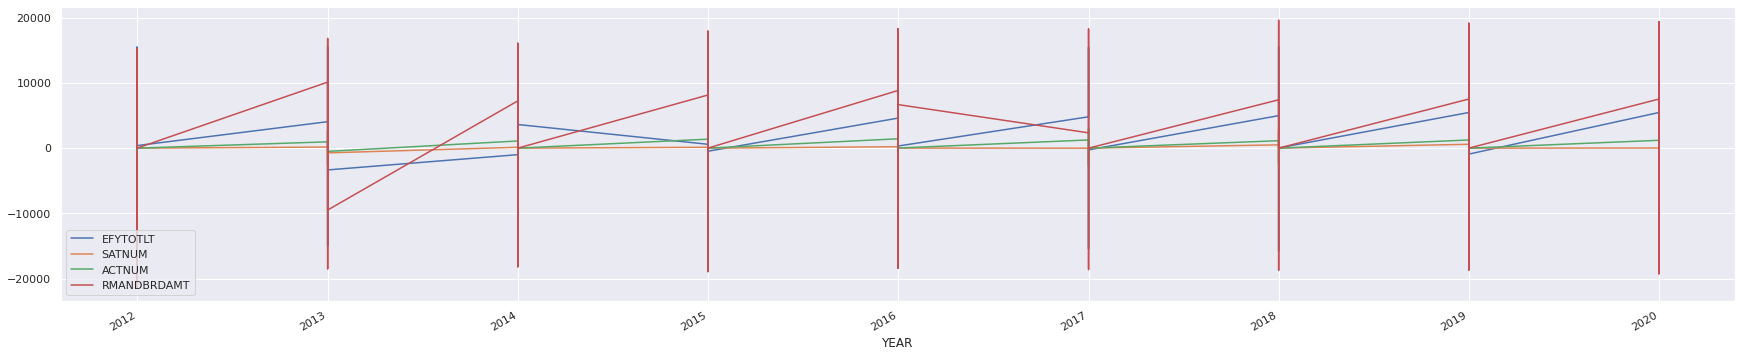

In [ ]:
# Will not  pursue  - ### Taking a look at the data aggregated by both UNIT ID and Year 
# data = df_NUM[['YEAR','EFYTOTLT']]
data = df_NUM[['EFYTOTLT','SATNUM','ACTNUM','RMANDBRDAMT']]
# data=df_scaled[['EFYTOTLT','SATNUM','ACTNUM','RMANDBRDAMT']]
# data.set_index(['UNITID','YEAR'], inplace=True)
# data.index
# rom pandas import read_csv
# from matplotlib import pyplot
# load dataset
# series = read_csv('car-sales.csv', header=0, index_col=0)
# seasonal difference
differenced = data.diff(1)
# trim off the first year of empty data
differenced = differenced[1:]
# save differenced dataset to file
differenced.to_csv('seasonally_adjusted.csv', index=False)
# plot differenced dataset
differenced.plot()
plt.show()

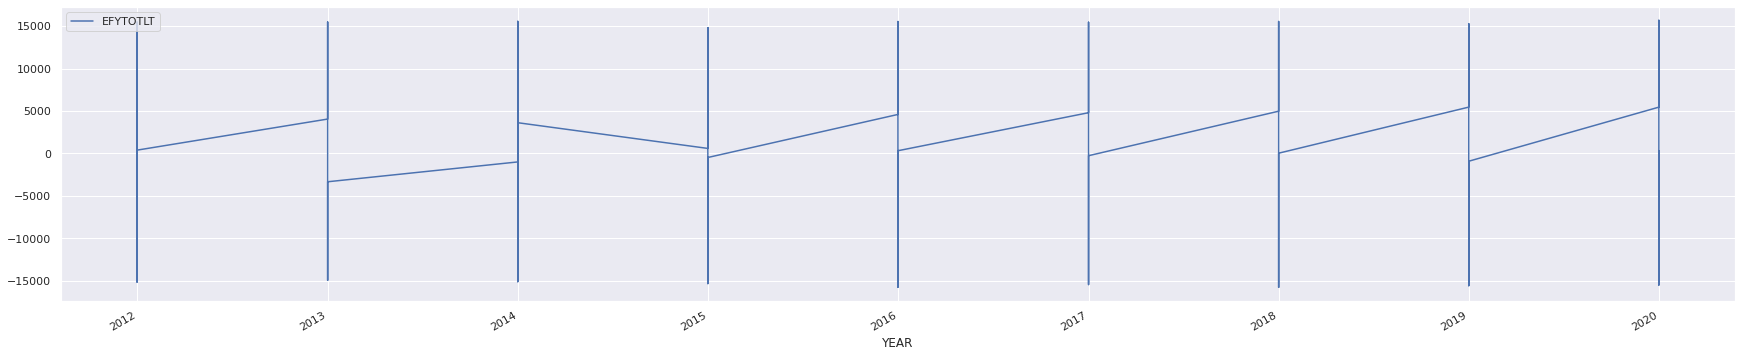

In [ ]:
# Will not  pursue  - ### Taking a look at the data aggregated by both UNIT ID and Year 
data = df_NUM[['EFYTOTLT']]
# data = df_NUM[['EFYTOTLT','SATNUM','ACTNUM','RMANDBRDAMT']]
# data=df_scaled[['EFYTOTLT','SATNUM','ACTNUM','RMANDBRDAMT']]
# data.set_index(['UNITID','YEAR'], inplace=True)
# data.index
# rom pandas import read_csv
# from matplotlib import pyplot
# load dataset
# series = read_csv('car-sales.csv', header=0, index_col=0)
# seasonal difference
differenced = data.diff(1)
# trim off the first year of empty data
differenced = differenced[1:]
# save differenced dataset to file
differenced.to_csv('seasonally_adjusted.csv', index=False)
# plot differenced dataset
differenced.plot()
plt.show()

In [ ]:
df_NUM
# df_NUM.EFYTOTLT

,UNITID,APPLFEEU,RMANDBRDAMT,SATNUM,ACTNUM,EFYTOTLT
YEAR,,,,,,
2012-01-01,100654,30,10119,113,820,4582
2012-01-01,100663,30,9294,79,1500,12962
2012-01-01,100690,50,0,0,0,522
2012-01-01,100706,30,8070,120,581,6983
2012-01-01,100724,25,4600,203,972,5541
...,...,...,...,...,...,...
2020-01-01,495925,0,0,0,0,182
2020-01-01,495934,0,0,0,0,192
2020-01-01,495952,0,0,0,0,67


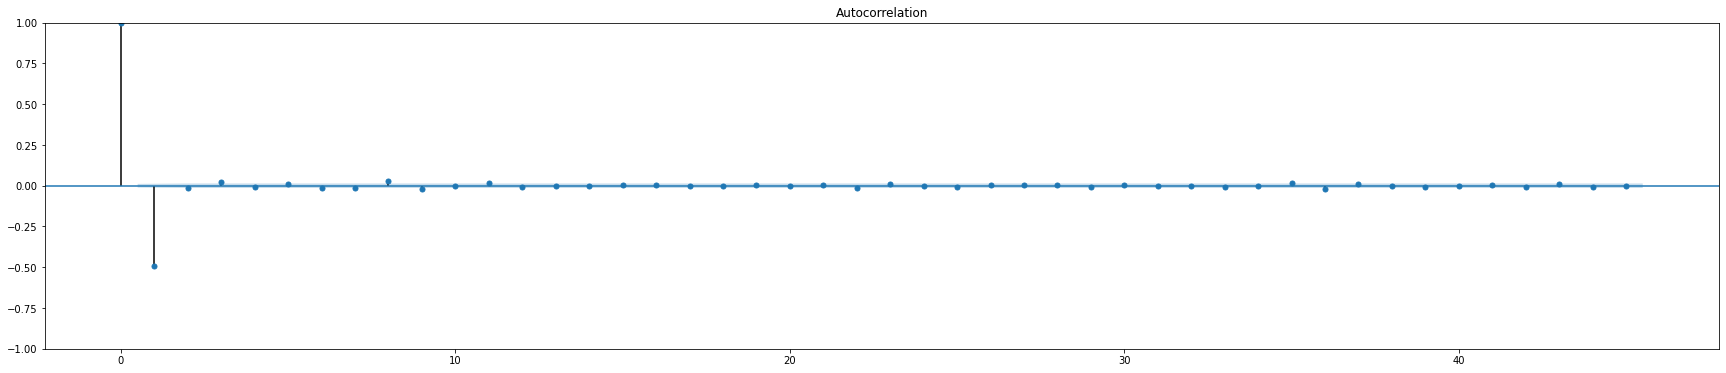

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# from matplotlib import pyplot
series = pd.read_csv('seasonally_adjusted.csv', header=0)
plot_acf(series)
plt.show()

In [ ]:
# from pandas import DataFrame
# load dataset
series = pd.read_csv('seasonally_adjusted.csv', header=0)
# reframe as supervised learning
dataframe = pd.DataFrame()
for i in range(9,0,-1):
	dataframe['t-'+str(i)] = series.shift(i).values[:,0]
dataframe['t'] = series.values[:,0]
print(dataframe.head(10))
dataframe = dataframe[10:]
# save to new file
dataframe.to_csv('lags_9_features.csv', index=False)

      t-9      t-8      t-7      t-6      t-5      t-4      t-3      t-2  \
0     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2     NaN      NaN      NaN      NaN      NaN      NaN      NaN   8380.0   
3     NaN      NaN      NaN      NaN      NaN      NaN   8380.0 -12440.0   
4     NaN      NaN      NaN      NaN      NaN   8380.0 -12440.0   6461.0   
5     NaN      NaN      NaN      NaN   8380.0 -12440.0   6461.0  -1442.0   
6     NaN      NaN      NaN   8380.0 -12440.0   6461.0  -1442.0  -2302.0   
7     NaN      NaN   8380.0 -12440.0   6461.0  -1442.0  -2302.0   2185.0   
8     NaN   8380.0 -12440.0   6461.0  -1442.0  -2302.0   2185.0  -4070.0   
9  8380.0 -12440.0   6461.0  -1442.0  -2302.0   2185.0  -4070.0   1146.0   

       t-1        t  
0      NaN   8380.0  
1   8380.0 -12440.0  
2 -12440.0   6461.0  
3   6461.0  -1442.0  
4  -1442.0  -2302.0  
5  -2302.0   2185.0  
6   2185.

### The results seem to confirm that the data is really not autocorrelated. AT the most it depends - and only marginally - on the values from the previous year.
### This does not seem to be a surprising result, since we are looking at features that do not have a lot of influence on each other as the correlation graphs confirm above. 

[0.06053063 0.06151013 0.05993446 0.06321771 0.06459222 0.06701126
 0.07621913 0.12719725 0.41978721]


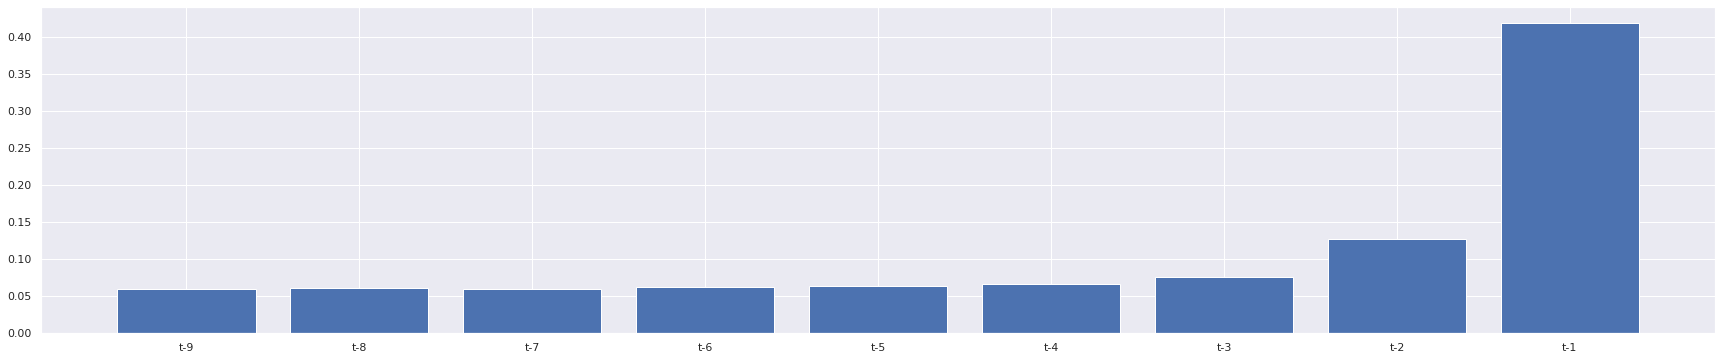

In [ ]:
# # from pandas import read_csv
# from sklearn.ensemble import RandomForestRegressor
# # from matplotlib import pyplot
# # load data
# dataframe = pd.read_csv('lags_9_features.csv', header=0)
# array = dataframe.values
# # split into input and output
# X = array[:,0:-1]
# y = array[:,-1]
# # fit random forest model
# rndmf_model = RandomForestRegressor(n_estimators=500, random_state=1)
# rndmf_model.fit(X, y)
# # show importance scores
# print(rndmf_model.feature_importances_)
# # plot importance scores
# names = dataframe.columns.values[0:-1]
# ticks = [i for i in range(len(names))]
# plt.bar(ticks, rndmf_model.feature_importances_)
# plt.xticks(ticks, names)
# plt.show()

In [ ]:
# from pandas import read_csv
# from sklearn.ensemble import RandomForestRegressor
# from matplotlib import pyplot
# load data
dataframe = pd.read_csv('lags_9_features.csv', header=0)
dataframe.head()
# array = dataframe.values

,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,-12440.0,6461.0,-1442.0,-2302.0,2185.0,-4070.0,1146.0,-1651.0,278.0,2604.0
1,6461.0,-1442.0,-2302.0,2185.0,-4070.0,1146.0,-1651.0,278.0,2604.0,3031.0
2,-1442.0,-2302.0,2185.0,-4070.0,1146.0,-1651.0,278.0,2604.0,3031.0,-3125.0
3,-2302.0,2185.0,-4070.0,1146.0,-1651.0,278.0,2604.0,3031.0,-3125.0,5845.0
4,2185.0,-4070.0,1146.0,-1651.0,278.0,2604.0,3031.0,-3125.0,5845.0,-2609.0


In [ ]:

dataframe = pd.read_csv('lags_9_features.csv', header=0)
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]
# fit random forest model
reg_model = LinearRegression()
reg_model.fit(X, y)
reg_model.score(X,y)


0.43311560876490773

### Using the Random Forest Regression model we see that the model actually suggests four lag periods 

In [ ]:
## For outliers detection
from sklearn import preprocessing, svm
## For stationarity test and decomposition
import statsmodels.tsa.api as smt
import statsmodels.api as sm

Selected Features:
t-4
t-3
t-2
t-1


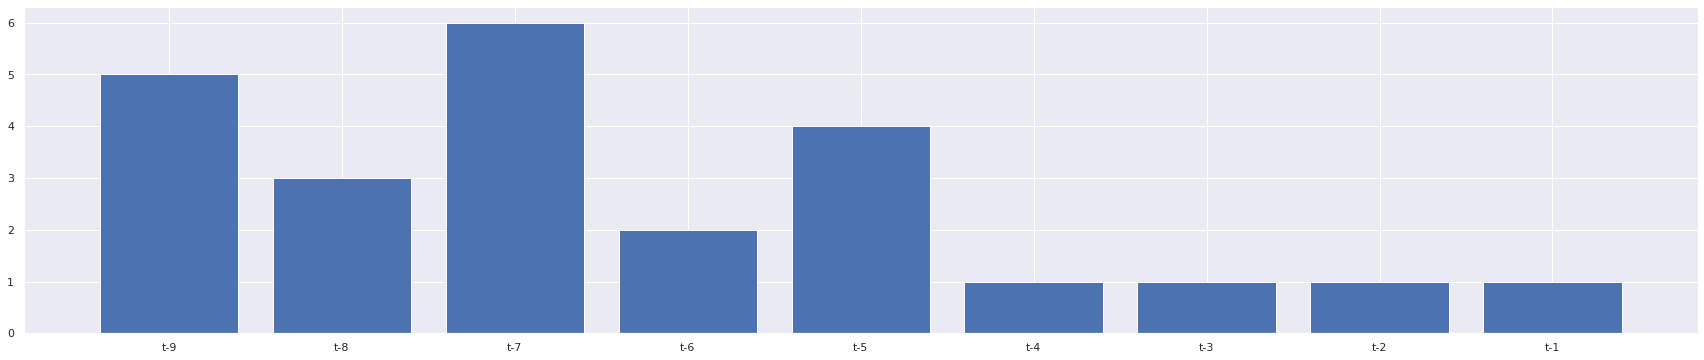

In [ ]:
# # https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/
# t-4

# # from pandas import read_csv
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor
# # from matplotlib import pyplot
# # load dataset
# dataframe = pd.read_csv('lags_9_features.csv', header=0)
# # separate into input and output variables
# array = dataframe.values
# X = array[:,0:-1]
# y = array[:,-1]
# # perform feature selection
# rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=42))
# # rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=42), n_features_to_select=3)
# fit = rfe.fit(X, y)
# # report selected features
# print('Selected Features:')
# names = dataframe.columns.values[0:-1]
# for i in range(len(fit.support_)):
# 	if fit.support_[i]:
# 		print(names[i])
# # plot feature rank
# names = dataframe.columns.values[0:-1]
# ticks = [i for i in range(len(names))]
# plt.bar(ticks, fit.ranking_)
# plt.xticks(ticks, names)
# plt.show()

In [ ]:
# https://towardsdatascience.com/time-series-analysis-for-machine-learning-with-python-626bee0d0205 # SOURCE CODE FOR THE FOLLOWING TIME SERIES ANALYSIS 

# NOTE I REACH THE SAME CONCLUSION AS ABOVE AGGREGATELY THE TIME SERIES IS STATIONARY 

df_NUM

,UNITID,APPLFEEU,RMANDBRDAMT,SATNUM,ACTNUM,EFYTOTLT
YEAR,,,,,,
2012-01-01,100654,30,10119,113,820,4582
2012-01-01,100663,30,9294,79,1500,12962
2012-01-01,100690,50,0,0,0,522
2012-01-01,100706,30,8070,120,581,6983
2012-01-01,100724,25,4600,203,972,5541
...,...,...,...,...,...,...
2020-01-01,495925,0,0,0,0,182
2020-01-01,495934,0,0,0,0,192
2020-01-01,495952,0,0,0,0,67


In [ ]:
# df_NUM['UNITID'].astype(int)
df_NUM = df_NUM.astype({'UNITID':int})
# df = df.astype({"Unit_Price": str})

In [ ]:
df_NUM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30177 entries, 2012-01-01 to 2020-01-01
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   UNITID       30177 non-null  int64
 1   APPLFEEU     30177 non-null  int64
 2   RMANDBRDAMT  30177 non-null  int64
 3   SATNUM       30177 non-null  int64
 4   ACTNUM       30177 non-null  int64
 5   EFYTOTLT     30177 non-null  int64
dtypes: int64(6)
memory usage: 1.6 MB


In [ ]:
# ts = df_NUM.groupby(['YEAR','UNITID'])['EFYTOTLT'].sum().rename("students")
ts = df_NUM.groupby('YEAR')['EFYTOTLT'].sum().rename("students")
ts.head()

YEAR
2012-01-01    11773388
2013-01-01    11597145
2014-01-01    11506836
2015-01-01    11187255
2016-01-01    11024765
Name: students, dtype: int64

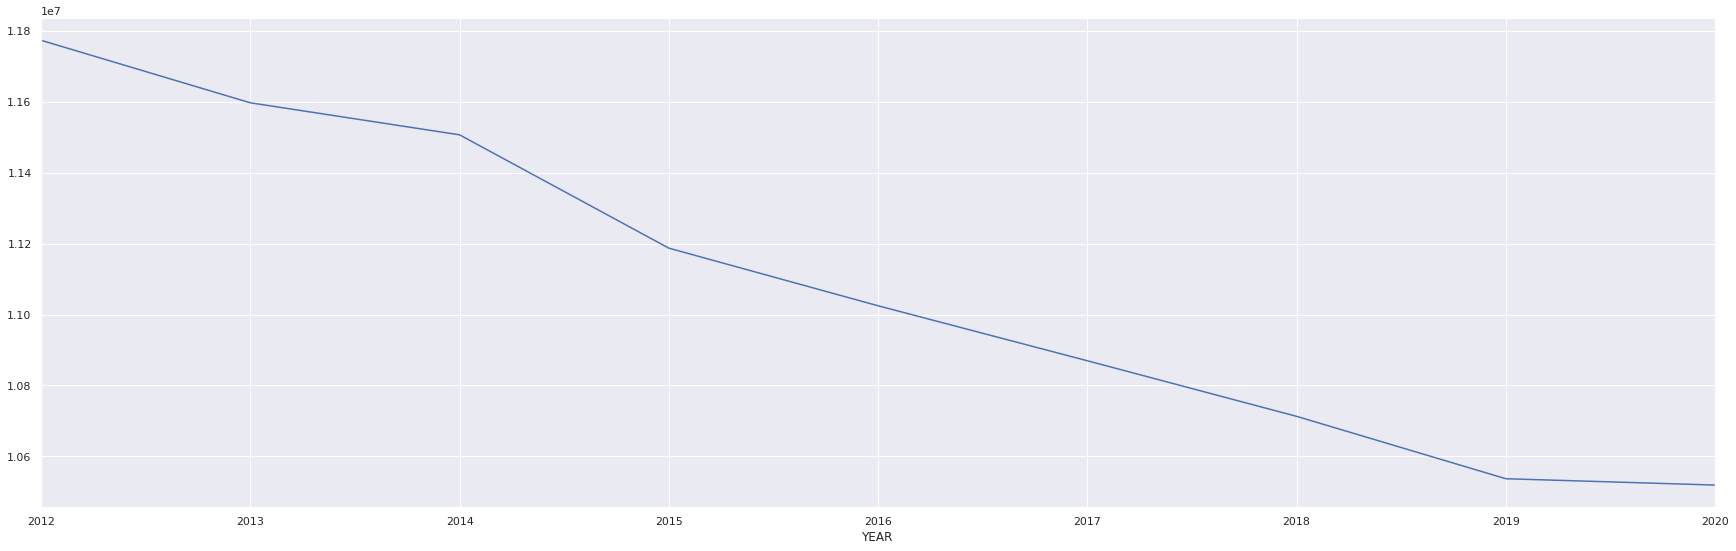

In [ ]:
# (df_NUM.EFYTOTLT).plot()
ts.plot()

In [ ]:
'''
Plot ts with rolling mean and 95% confidence interval with rolling std.
:parameter    
  :param ts: pandas Series    
  :param window: num - for rolling stats
  :param plot_ma: bool - whether plot moving average
  :param plot_intervals: bool - whether plot upper and lower bounds
'''
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = ts.rolling(window=window).mean()    
   rolling_std = ts.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title(ts.name)    
   plt.plot(ts[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

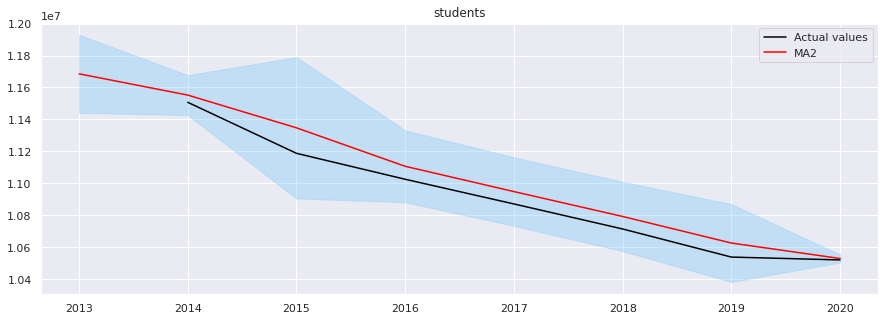

In [ ]:
plot_ts(ts, window=2)

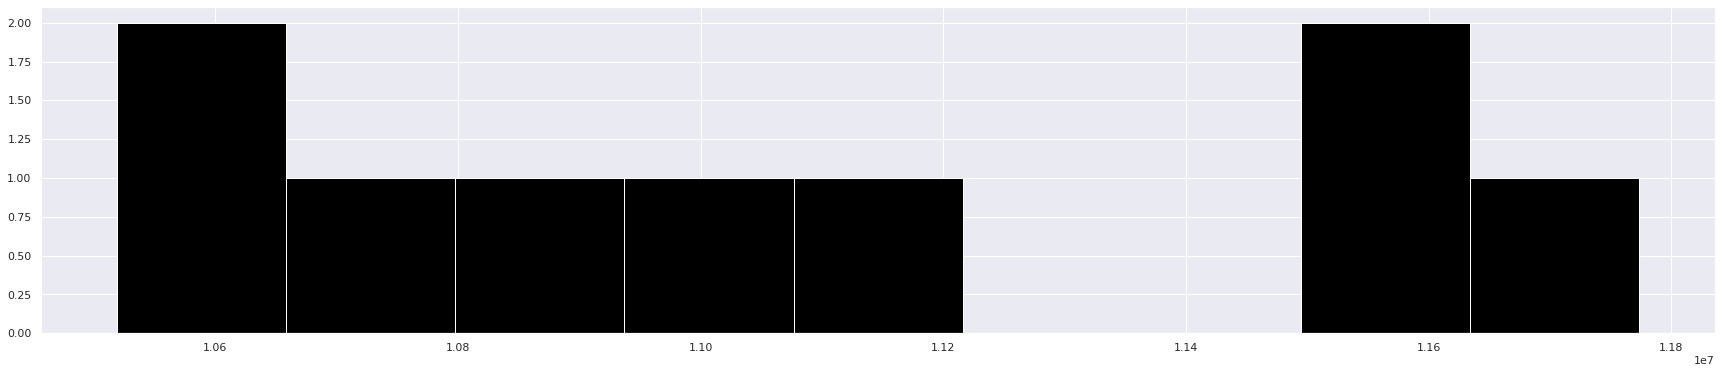

In [ ]:
## Plot histogram
ts.hist(color="black", bins=9)

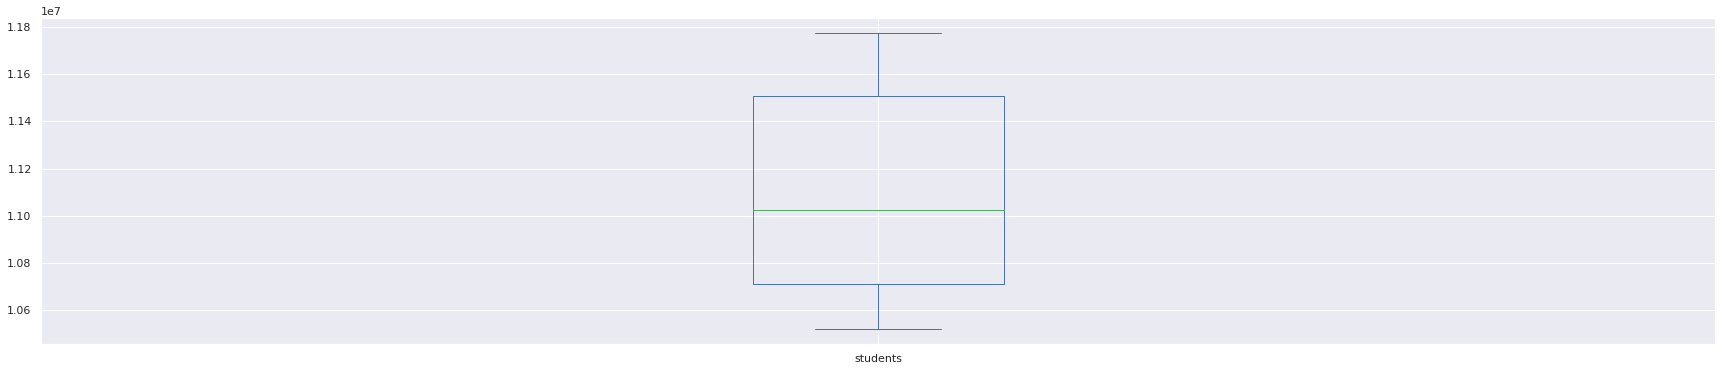

In [ ]:
## Boxplot
ts.plot.box()

In [ ]:
'''
Find outliers using sklearn unsupervised support vetcor machine.
:parameter
    :param ts: pandas Series
    :param perc: float - percentage of outliers to look for
:return
    dtf with raw ts, outlier 1/0 (yes/no), numeric index
'''
def find_outliers(ts, perc=0.01, figsize=(15,5)):
    ## fit svm
    scaler = preprocessing.StandardScaler()
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1,1))
    model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
    model.fit(ts_scaled)
    ## dtf output
    dtf_outliers = ts.to_frame(name="ts")
    dtf_outliers["index"] = range(len(ts))
    dtf_outliers["outlier"] = model.predict(ts_scaled)
    dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                              x: 1 if x==-1 else 0)
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title="Outliers detection: found"
           +str(sum(dtf_outliers["outlier"]==1)))
    ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
            color="black")
    ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
               y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
               color='red')
    ax.grid(True)
    plt.show()
    return dtf_outliers

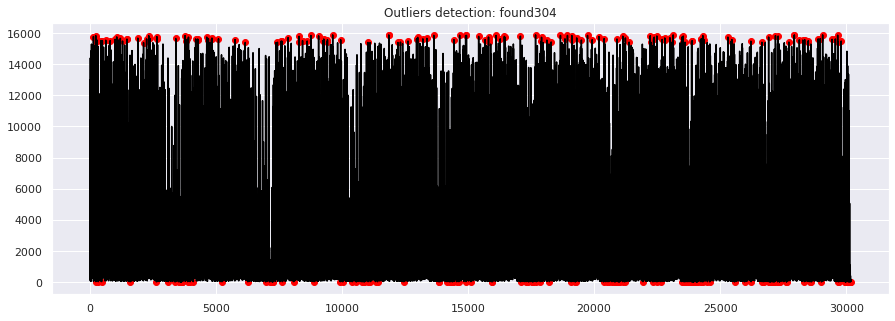

,ts,index,outlier
YEAR,,,
2012-01-01,4582,0,0
2012-01-01,12962,1,0
2012-01-01,522,2,0
2012-01-01,6983,3,0
2012-01-01,5541,4,0
...,...,...,...
2020-01-01,182,30172,0
2020-01-01,192,30173,0
2020-01-01,67,30174,0


In [ ]:
find_outliers(df_NUM.EFYTOTLT)

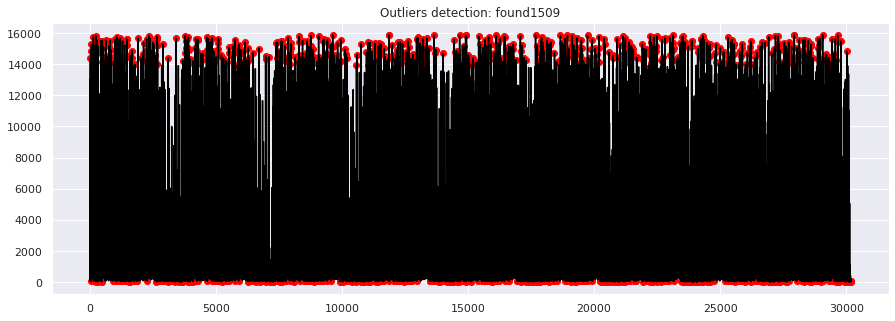

,ts,index,outlier
YEAR,,,
2012-01-01,4582,0,0
2012-01-01,12962,1,0
2012-01-01,522,2,0
2012-01-01,6983,3,0
2012-01-01,5541,4,0
...,...,...,...
2020-01-01,182,30172,0
2020-01-01,192,30173,0
2020-01-01,67,30174,1


In [ ]:
find_outliers(df_NUM.EFYTOTLT, perc=0.05)

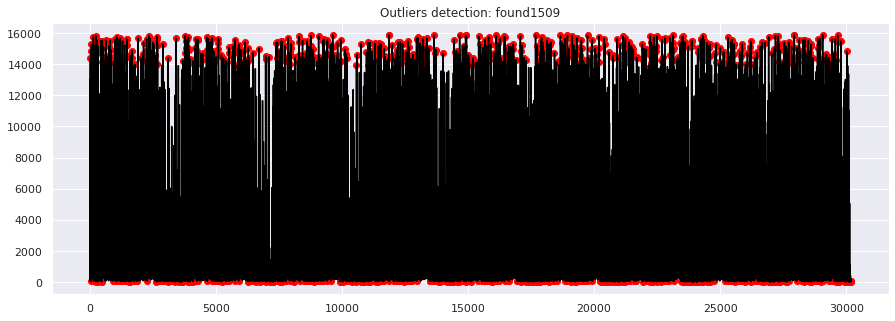

In [ ]:
dtf_outliers = find_outliers(df_NUM.EFYTOTLT, perc=0.05)

In [ ]:
'''
Interpolate outliers in a ts.
'''
def remove_outliers(ts, outliers_idx, figsize=(15,5)):
    ts_clean = ts.copy()
    ts_clean.loc[outliers_idx] = np.nan
    ts_clean = ts_clean.interpolate(method="linear")
    ax = ts.plot(figsize=figsize, color="red", alpha=0.5,
         title="Remove outliers", label="original", legend=True)
    ts_clean.plot(ax=ax, grid=True, color="black",
                  label="interpolated", legend=True)
    plt.show()
    return ts_clean

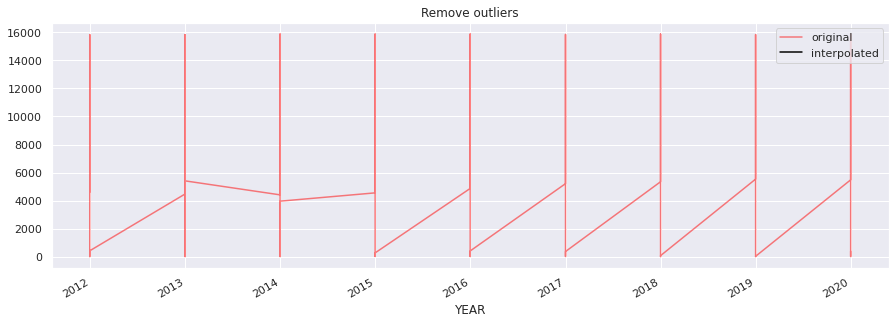

In [ ]:
## outliers index position
outliers_index_pos = dtf_outliers[dtf_outliers["outlier"]==1].index
## exclude outliers
ts_clean = remove_outliers(df_NUM.EFYTOTLT, outliers_idx=outliers_index_pos)

In [ ]:
'''
Test stationarity by:
    - running Augmented Dickey-Fuller test wiht 95%
    - plotting mean and variance of a sample from data
    - plottig autocorrelation and partial autocorrelation
'''
def test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30, figsize= 
                              (15,10)):
    with plt.style.context(style='bmh'):
        ## set figure
        fig = plt.figure(figsize=figsize)
        ts_ax = plt.subplot2grid(shape=(2,2), loc=(0,0), colspan=2)
        pacf_ax = plt.subplot2grid(shape=(2,2), loc=(1,0))
        acf_ax = plt.subplot2grid(shape=(2,2), loc=(1,1))
        
        ## plot ts with mean/std of a sample from the first x% 
        dtf_ts = ts.to_frame(name="ts")
        sample_size = int(len(ts)*sample)
        dtf_ts["mean"] = dtf_ts["ts"].head(sample_size).mean()
        dtf_ts["lower"] = dtf_ts["ts"].head(sample_size).mean() + dtf_ts["ts"].head(sample_size).std()
        dtf_ts["upper"] = dtf_ts["ts"].head(sample_size).mean() - dtf_ts["ts"].head(sample_size).std()
        dtf_ts["ts"].plot(ax=ts_ax, color="black", legend=False)
        dtf_ts["mean"].plot(ax=ts_ax, legend=False, color="red",linestyle="--", linewidth=0.7)
        ts_ax.fill_between(x=dtf_ts.index, y1=dtf_ts['lower'], y2=dtf_ts['upper'], color='lightskyblue', alpha=0.4)
        dtf_ts["mean"].head(sample_size).plot(ax=ts_ax,legend=False, color="red", linewidth=0.9)
        ts_ax.fill_between(x=dtf_ts.head(sample_size).index, y1=dtf_ts['lower'].head(sample_size), y2=dtf_ts['upper'].head(sample_size),color='lightskyblue')
        
        ## test stationarity (Augmented Dickey-Fuller)
        adfuller_test = sm.tsa.stattools.adfuller(ts, maxlag=maxlag, autolag="AIC")
        adf, p, critical_value = adfuller_test[0], adfuller_test[1], adfuller_test[4]["5%"]
        p = round(p, 3)
        conclusion = "Stationary" if p < 0.05 else "Non-Stationary"
        ts_ax.set_title('Dickey-Fuller Test 95%: '+conclusion+'(p value: '+str(p)+')')
        
        ## pacf (for AR) e acf (for MA) 
        smt.graphics.plot_pacf(ts, lags=maxlag, ax=pacf_ax, title="Partial Autocorrelation (for AR component)")
        smt.graphics.plot_acf(ts, lags=maxlag, ax=acf_ax, title="Autocorrelation (for MA component)")
        plt.tight_layout()

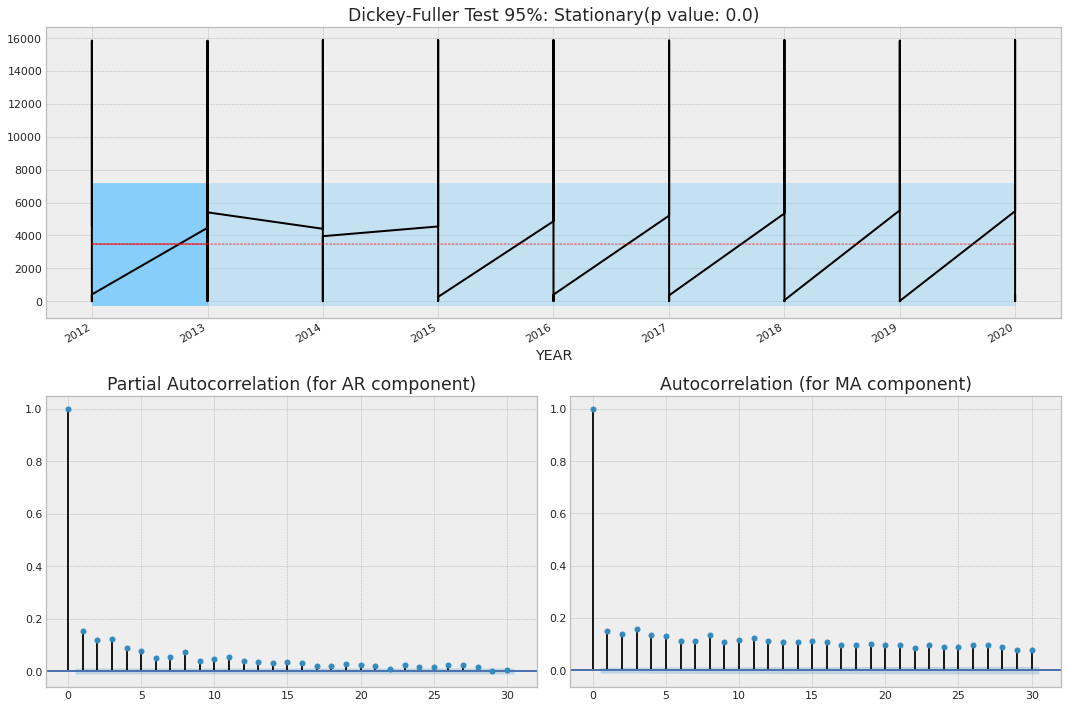

In [ ]:
test_stationarity_acf_pacf(df_NUM.EFYTOTLT, sample=0.20, maxlag=30)

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# statsmodels.tsa.arima.model.ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [ ]:


# # 1,1,2 ARIMA Model
# model = ARIMA(df.value, order=(1,1,2))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())


# 1,1,2 ARIMA Model
model1 = ARIMA(df_NUM.EFYTOTLT, order=(1,0,4))
model1_fit = model1.fit()
print(model1_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               EFYTOTLT   No. Observations:                30177
Model:                     ARMA(1, 4)   Log Likelihood             -289304.591
Method:                       css-mle   S.D. of innovations           3526.175
Date:                Mon, 09 May 2022   AIC                         578623.181
Time:                        17:59:04   BIC                         578681.385
Sample:                             0   HQIC                        578641.851
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3304.7798    180.553     18.304      0.000    2950.902    3658.658
ar.L1.EFYTOTLT     0.9970      0.001   1564.169      0.000       0.996       0.998
ma.L1.EFYTOTLT    -0.9322      0.006

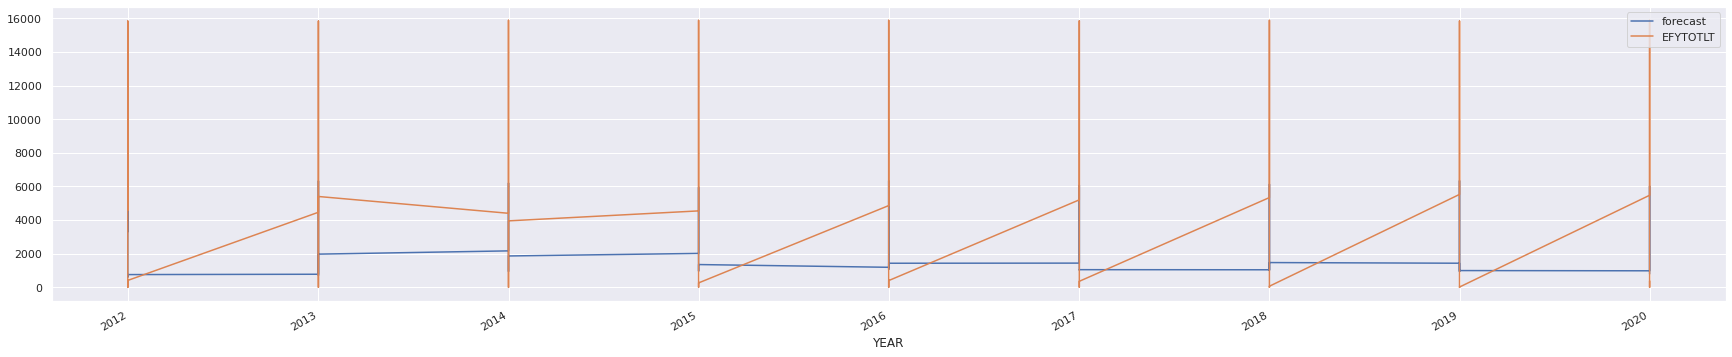

In [ ]:
# Actual vs Fitted
model1_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
model2 = ARIMA(df_NUM.EFYTOTLT, order=(4,0,1))
model2_fit = model2.fit()
print(model2_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               EFYTOTLT   No. Observations:                30177
Model:                     ARMA(4, 1)   Log Likelihood             -289297.285
Method:                       css-mle   S.D. of innovations           3525.321
Date:                Mon, 09 May 2022   AIC                         578608.570
Time:                        18:00:34   BIC                         578666.774
Sample:                             0   HQIC                        578627.240
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3304.7802    187.273     17.647      0.000    2937.732    3671.828
ar.L1.EFYTOTLT     1.0447      0.006    172.197      0.000       1.033       1.057
ar.L2.EFYTOTLT    -0.0141      0.008

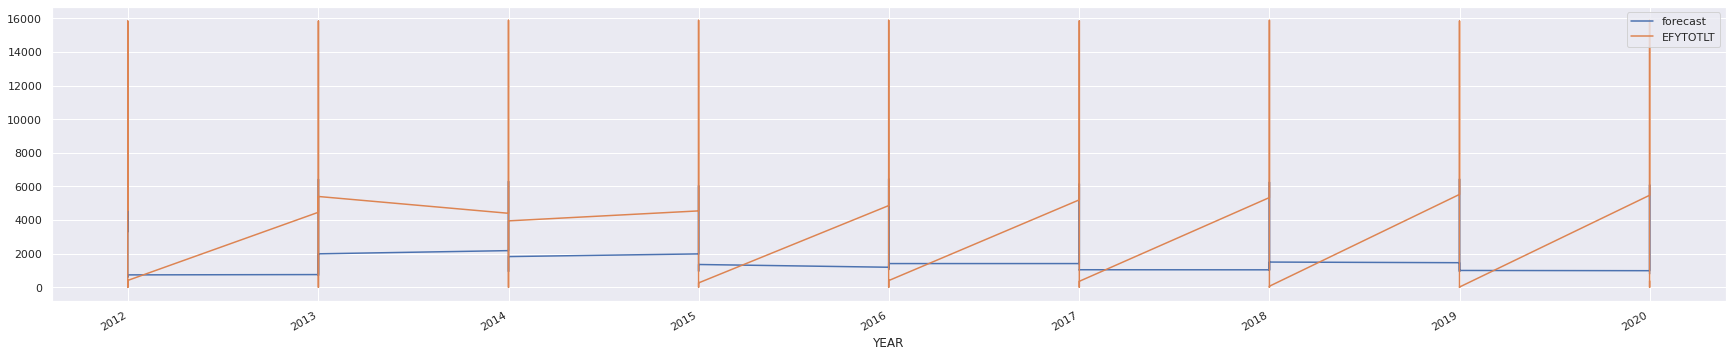

In [ ]:
# Actual vs Fitted
model2_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
model3 = ARIMA(df_NUM.EFYTOTLT, order=(4,0,4))
model3_fit = model3.fit() #disp=0
print(model3_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               EFYTOTLT   No. Observations:                30177
Model:                     ARMA(4, 4)   Log Likelihood             -289260.722
Method:                       css-mle   S.D. of innovations           3521.054
Date:                Mon, 09 May 2022   AIC                         578541.445
Time:                        18:01:52   BIC                         578624.593
Sample:                             0   HQIC                        578568.116
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3304.7822    205.727     16.064      0.000    2901.565    3708.000
ar.L1.EFYTOTLT     0.4995      0.150      3.320      0.001       0.205       0.794
ar.L2.EFYTOTLT     0.9046      0.208

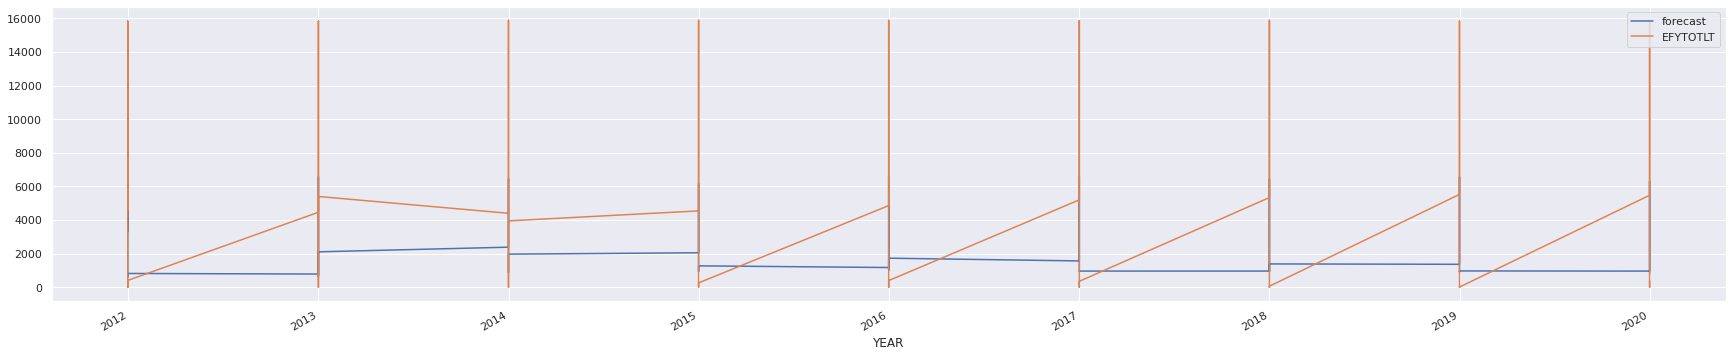

In [ ]:
# Actual vs Fitted
model3_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
model4 = ARIMA(df_NUM.EFYTOTLT, order=(1,0,1))
model4_fit = model4.fit()
# model4_fit = model4.fit(disp=0)
print(model4_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               EFYTOTLT   No. Observations:                30177
Model:                     ARMA(1, 1)   Log Likelihood             -289364.687
Method:                       css-mle   S.D. of innovations           3533.222
Date:                Mon, 09 May 2022   AIC                         578737.374
Time:                        17:57:50   BIC                         578770.633
Sample:                             0   HQIC                        578748.042
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3304.7803    110.302     29.961      0.000    3088.593    3520.968
ar.L1.EFYTOTLT     0.9899      0.002    520.727      0.000       0.986       0.994
ma.L1.EFYTOTLT    -0.9452      0.005

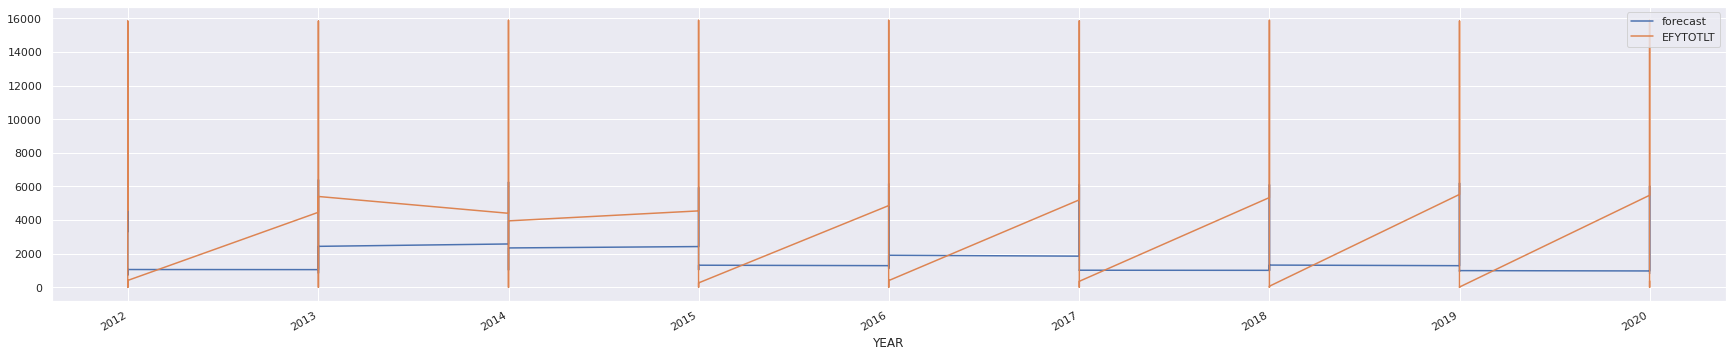

In [ ]:
# Actual vs Fitted
model4_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
model5 = ARIMA(df_NUM.EFYTOTLT, order=(8,0,8))
model5_fit = model5.fit(disp=0)
print(model5_fit.summary())

NotImplementedError: ignored

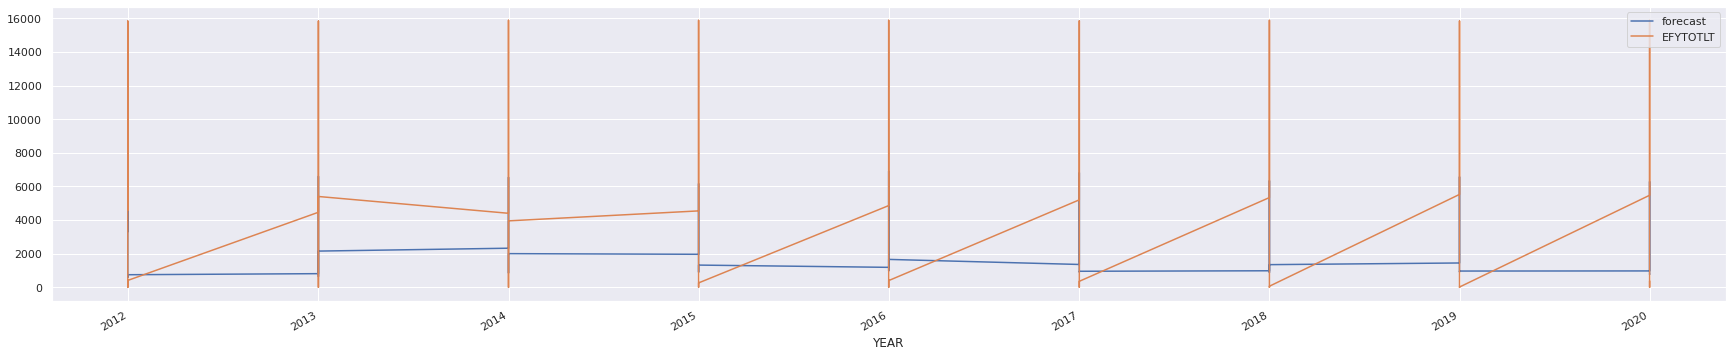

In [ ]:
# Actual vs Fitted
model5_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# import pmdarima as pm

# # df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# model = pm.auto_arima(df_NUM['EFYTOTLT'].values, start_p=1, start_q=1,
#                       test='adf',       # use adftest to find optimal 'd'
#                       max_p=3, max_q=3, # maximum p and q
#                       m=1,              # frequency of series
#                       d=None,           # let model determine 'd'
#                       seasonal=False,   # No Seasonality
#                       start_P=0, 
#                       D=0, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

# print(model.summary())

In [ ]:
# statsmodels.tsa.arima.model.ARIMA
from statsmodels.tsa.arima.model import ARIMA
model_best = ARIMA(df_NUM.EFYTOTLT, order=(2,0,2))
model_best_fit = model_best.fit()
print(model_best_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:               EFYTOTLT   No. Observations:                30177
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -289275.513
Date:                Mon, 09 May 2022   AIC                         578563.027
Time:                        18:54:41   BIC                         578612.916
Sample:                             0   HQIC                        578579.030
                              - 30177                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3304.7649    228.592     14.457      0.000    2856.733    3752.797
ar.L1          1.8758      0.018    106.109      0.000       1.841       1.910
ar.L2         -0.8760      0.018    -49.702      0.0

In [ ]:
df_NUM.EFYTOTLT

YEAR
2012-01-01     4582
2012-01-01    12962
2012-01-01      522
2012-01-01     6983
2012-01-01     5541
              ...  
2020-01-01      182
2020-01-01      192
2020-01-01       67
2020-01-01       51
2020-01-01      383
Name: EFYTOTLT, Length: 30177, dtype: int64